# 520TonEnjPres VERİLERİ ANOMALİ TESPİTİ VE ANALİZİ İLE UYARI SİSTEMİ TASARIMI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# Veriyi yükleyelim
df = pd.read_csv("yeni_veri/520TonEnjPres_verileri_temizlenmis.csv")


In [3]:
df.head(3)

,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime
0,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:00
1,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:00
2,1,54355,MAK1,0.09,6,2.91,55,940,378,168,952,850,2025-01-08 00:02:00


In [4]:
# Sütunları kontrol edelim
print(df.columns)

Index(['kalip', 'cycleSayisi', 'makineKodu', 'SCLPAR_VALUE_V1',
       'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
       'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
       'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS', 'datetime'],
      dtype='object')


### Anomali Tespiti

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def rolling_zscore_anomali_analiz(df, hedef_sutun, window=180, threshold=4, zaman_sutun='datetime'):
    df = df.copy()
    df = df.sort_values(by=zaman_sutun)

    rolling_mean = df[hedef_sutun].rolling(window=window, min_periods=1).mean()
    rolling_std = df[hedef_sutun].rolling(window=window, min_periods=1).std()

    z_score = (df[hedef_sutun] - rolling_mean) / rolling_std
    anomali_kolon_adi = hedef_sutun + '_anomaly'

    df['z_score'] = z_score
    df[anomali_kolon_adi] = z_score.abs() > threshold

    # Grafik çizimi
    anomaliler = df[df[anomali_kolon_adi]]

    plt.figure(figsize=(15, 5))
    plt.plot(df[zaman_sutun], df[hedef_sutun], label='Veri', alpha=0.7)
    plt.scatter(anomaliler[zaman_sutun], anomaliler[hedef_sutun], color='red', label='Anomali', marker='x')
    plt.title(f"Rolling Z-Score Anomali Tespiti – {hedef_sutun}")
    plt.xlabel("Zaman")
    plt.ylabel(hedef_sutun)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"\n📌 {hedef_sutun} için Toplam Anomali Sayısı: {anomaliler.shape[0]}")
    if not anomaliler.empty:
        print("\n🕒 Anomali Zamanları ve Değerleri:")
        print(anomaliler[[zaman_sutun, zaman_sutun, hedef_sutun]])

    return  df[[anomali_kolon_adi]]




🚩 Analiz Başlıyor: SCLPAR_VALUE_V1


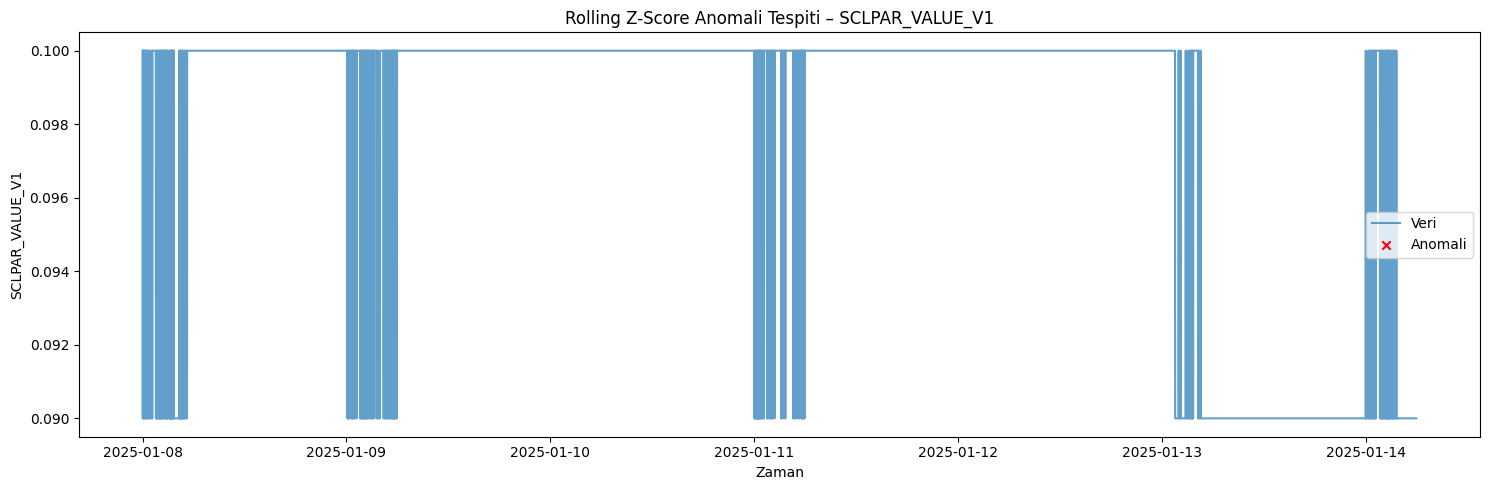


📌 SCLPAR_VALUE_V1 için Toplam Anomali Sayısı: 0


🚩 Analiz Başlıyor: SCLPAR_VALUE_P1


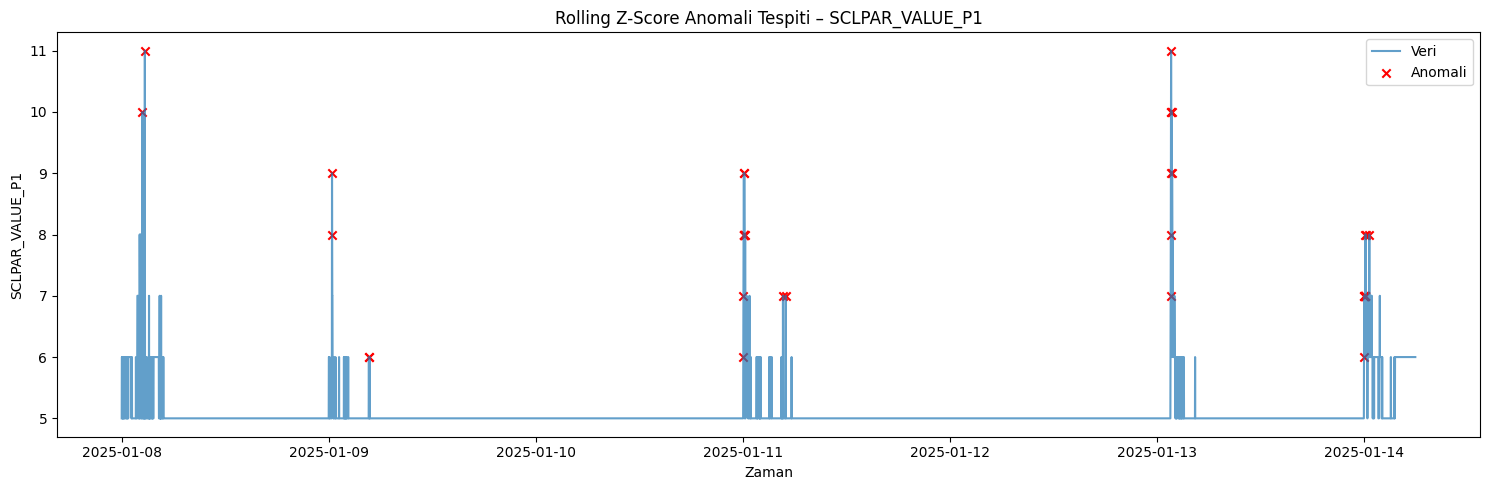


📌 SCLPAR_VALUE_P1 için Toplam Anomali Sayısı: 35

🕒 Anomali Zamanları ve Değerleri:
                datetime            datetime  SCLPAR_VALUE_P1
143  2025-01-08 02:23:00 2025-01-08 02:23:00               10
161  2025-01-08 02:41:00 2025-01-08 02:41:00               11
383  2025-01-09 00:23:00 2025-01-09 00:23:00                9
384  2025-01-09 00:24:00 2025-01-09 00:24:00                8
639  2025-01-09 04:39:00 2025-01-09 04:39:00                6
640  2025-01-09 04:40:00 2025-01-09 04:40:00                6
724  2025-01-11 00:04:00 2025-01-11 00:04:00                6
725  2025-01-11 00:05:00 2025-01-11 00:05:00                7
726  2025-01-11 00:06:00 2025-01-11 00:06:00                8
727  2025-01-11 00:07:00 2025-01-11 00:07:00                8
728  2025-01-11 00:08:00 2025-01-11 00:08:00                9
729  2025-01-11 00:09:00 2025-01-11 00:09:00                8
731  2025-01-11 00:11:00 2025-01-11 00:11:00                9
732  2025-01-11 00:12:00 2025-01-11 00:12:00   

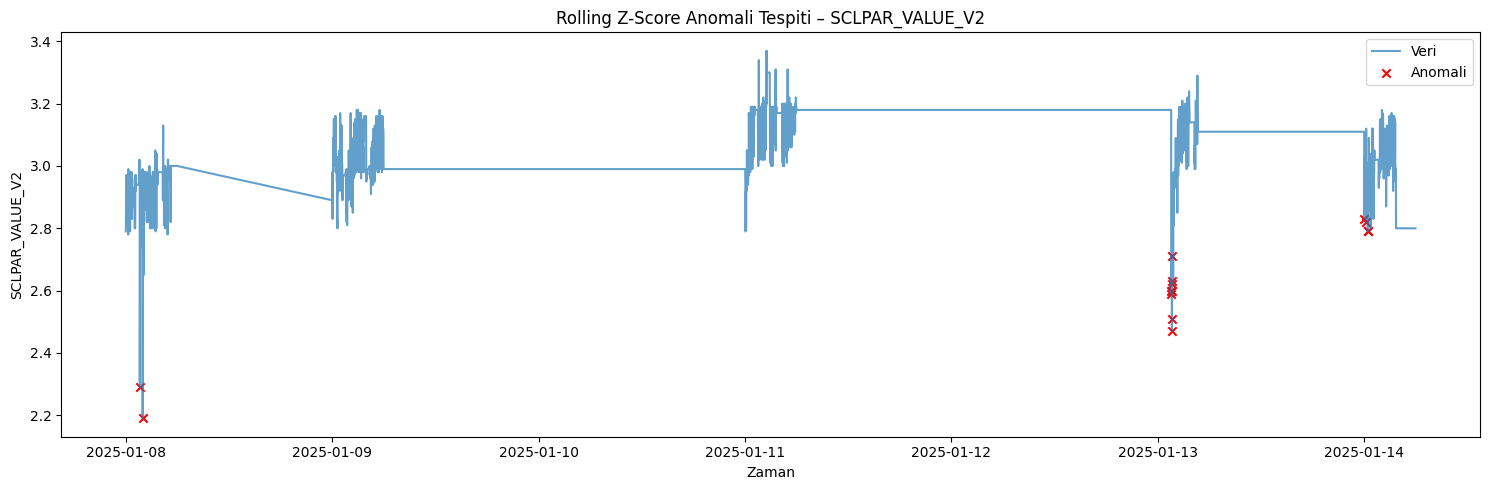


📌 SCLPAR_VALUE_V2 için Toplam Anomali Sayısı: 14

🕒 Anomali Zamanları ve Değerleri:
                datetime            datetime  SCLPAR_VALUE_V2
98   2025-01-08 01:38:00 2025-01-08 01:38:00             2.29
118  2025-01-08 01:58:00 2025-01-08 01:58:00             2.19
1175 2025-01-13 01:35:00 2025-01-13 01:35:00             2.60
1176 2025-01-13 01:36:00 2025-01-13 01:36:00             2.59
1177 2025-01-13 01:37:00 2025-01-13 01:37:00             2.71
1178 2025-01-13 01:38:00 2025-01-13 01:38:00             2.60
1179 2025-01-13 01:39:00 2025-01-13 01:39:00             2.47
1180 2025-01-13 01:40:00 2025-01-13 01:40:00             2.51
1181 2025-01-13 01:41:00 2025-01-13 01:41:00             2.62
1182 2025-01-13 01:42:00 2025-01-13 01:42:00             2.63
1442 2025-01-14 00:02:00 2025-01-14 00:02:00             2.83
1457 2025-01-14 00:17:00 2025-01-14 00:17:00             2.82
1465 2025-01-14 00:25:00 2025-01-14 00:25:00             2.79
1466 2025-01-14 00:26:00 2025-01-14 00:26:00   

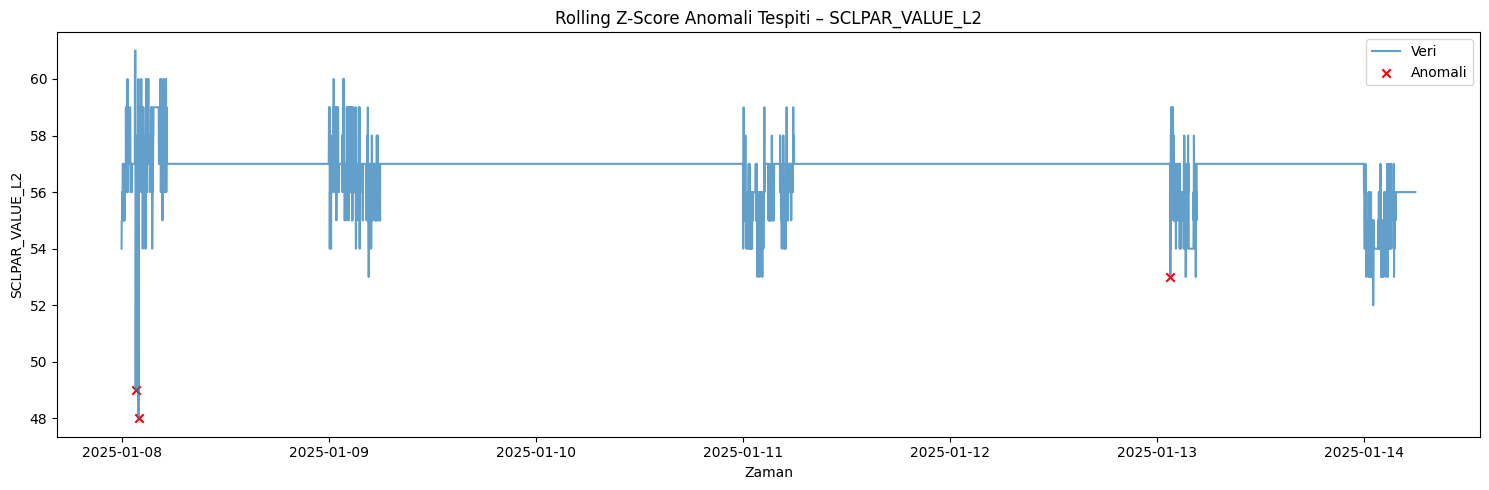


📌 SCLPAR_VALUE_L2 için Toplam Anomali Sayısı: 3

🕒 Anomali Zamanları ve Değerleri:
                datetime            datetime  SCLPAR_VALUE_L2
98   2025-01-08 01:38:00 2025-01-08 01:38:00               49
118  2025-01-08 01:58:00 2025-01-08 01:58:00               48
1175 2025-01-13 01:35:00 2025-01-13 01:35:00               53


🚩 Analiz Başlıyor: SCLPAR_VALUE_TM


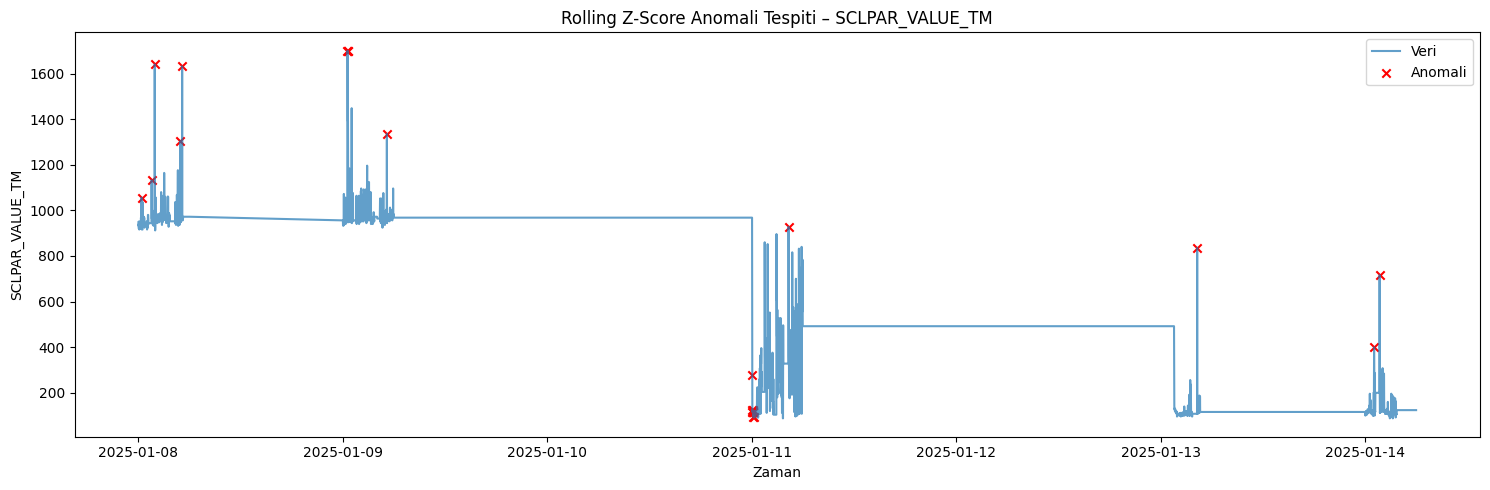


📌 SCLPAR_VALUE_TM için Toplam Anomali Sayısı: 24

🕒 Anomali Zamanları ve Değerleri:
                datetime            datetime  SCLPAR_VALUE_TM
22   2025-01-08 00:22:00 2025-01-08 00:22:00             1056
93   2025-01-08 01:33:00 2025-01-08 01:33:00             1132
115  2025-01-08 01:55:00 2025-01-08 01:55:00             1640
296  2025-01-08 04:56:00 2025-01-08 04:56:00             1304
308  2025-01-08 05:08:00 2025-01-08 05:08:00             1632
392  2025-01-09 00:32:00 2025-01-09 00:32:00             1700
393  2025-01-09 00:33:00 2025-01-09 00:33:00             1700
394  2025-01-09 00:34:00 2025-01-09 00:34:00             1700
670  2025-01-09 05:10:00 2025-01-09 05:10:00             1336
723  2025-01-11 00:03:00 2025-01-11 00:03:00              280
724  2025-01-11 00:04:00 2025-01-11 00:04:00              116
725  2025-01-11 00:05:00 2025-01-11 00:05:00              124
726  2025-01-11 00:06:00 2025-01-11 00:06:00              124
727  2025-01-11 00:07:00 2025-01-11 00:07:00   

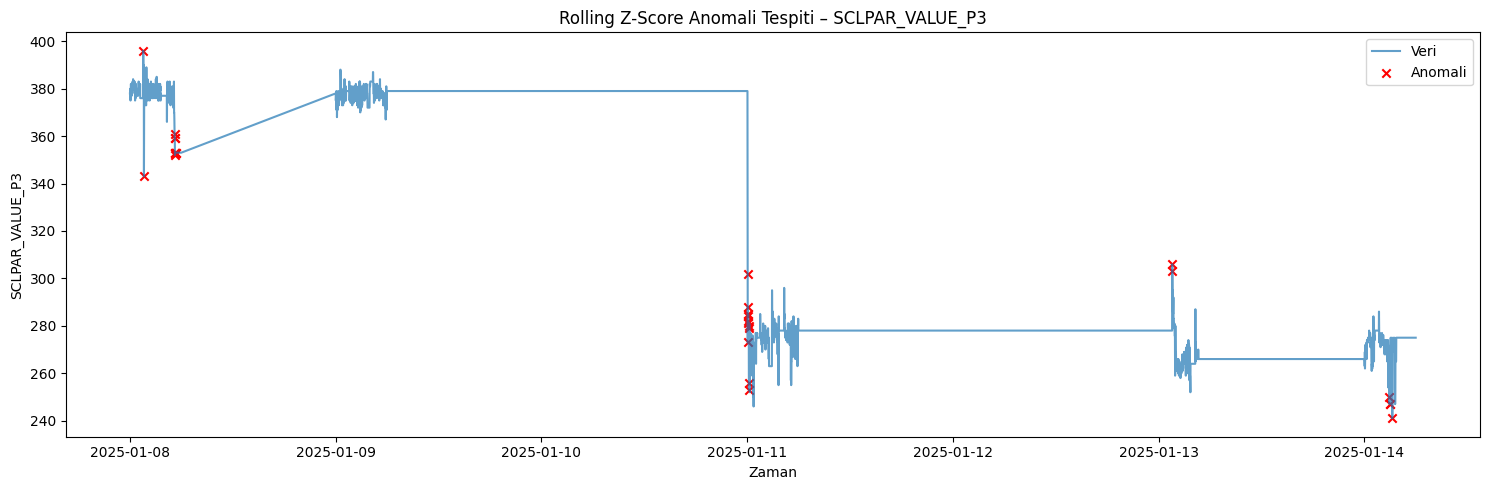


📌 SCLPAR_VALUE_P3 için Toplam Anomali Sayısı: 28

🕒 Anomali Zamanları ve Değerleri:
                datetime            datetime  SCLPAR_VALUE_P3
93   2025-01-08 01:33:00 2025-01-08 01:33:00              396
98   2025-01-08 01:38:00 2025-01-08 01:38:00              343
312  2025-01-08 05:12:00 2025-01-08 05:12:00              361
313  2025-01-08 05:13:00 2025-01-08 05:13:00              359
314  2025-01-08 05:14:00 2025-01-08 05:14:00              359
315  2025-01-08 05:15:00 2025-01-08 05:15:00              352
316  2025-01-08 05:16:00 2025-01-08 05:16:00              353
317  2025-01-08 05:17:00 2025-01-08 05:17:00              353
318  2025-01-08 05:18:00 2025-01-08 05:18:00              353
319  2025-01-08 05:19:00 2025-01-08 05:19:00              353
320  2025-01-08 05:20:00 2025-01-08 05:20:00              353
723  2025-01-11 00:03:00 2025-01-11 00:03:00              302
724  2025-01-11 00:04:00 2025-01-11 00:04:00              273
725  2025-01-11 00:05:00 2025-01-11 00:05:00   

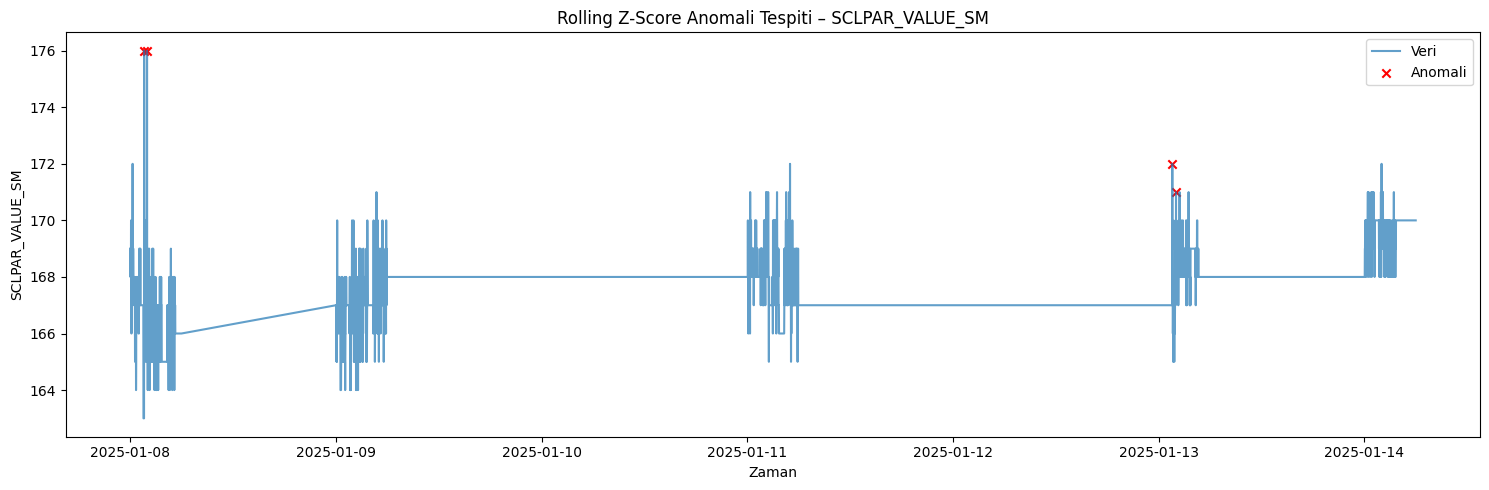


📌 SCLPAR_VALUE_SM için Toplam Anomali Sayısı: 4

🕒 Anomali Zamanları ve Değerleri:
                datetime            datetime  SCLPAR_VALUE_SM
98   2025-01-08 01:38:00 2025-01-08 01:38:00              176
118  2025-01-08 01:58:00 2025-01-08 01:58:00              176
1175 2025-01-13 01:35:00 2025-01-13 01:35:00              172
1201 2025-01-13 02:01:00 2025-01-13 02:01:00              171


🚩 Analiz Başlıyor: SCLPAR_VALUE_TR


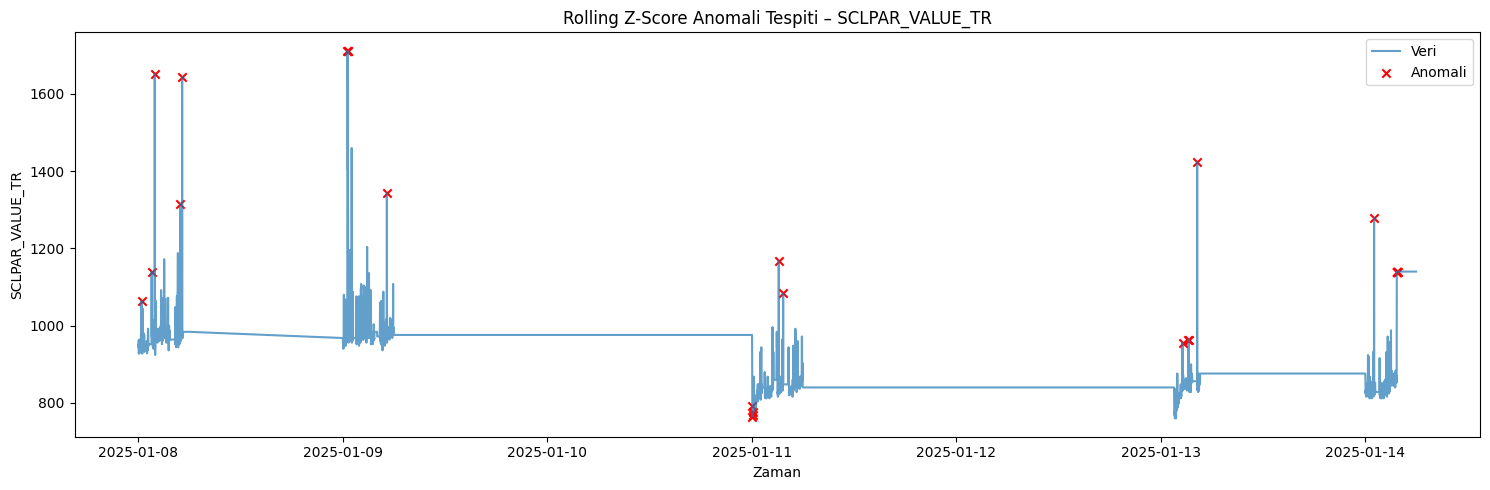


📌 SCLPAR_VALUE_TR için Toplam Anomali Sayısı: 26

🕒 Anomali Zamanları ve Değerleri:
                datetime            datetime  SCLPAR_VALUE_TR
22   2025-01-08 00:22:00 2025-01-08 00:22:00             1064
93   2025-01-08 01:33:00 2025-01-08 01:33:00             1140
115  2025-01-08 01:55:00 2025-01-08 01:55:00             1652
296  2025-01-08 04:56:00 2025-01-08 04:56:00             1316
308  2025-01-08 05:08:00 2025-01-08 05:08:00             1644
392  2025-01-09 00:32:00 2025-01-09 00:32:00             1712
393  2025-01-09 00:33:00 2025-01-09 00:33:00             1712
394  2025-01-09 00:34:00 2025-01-09 00:34:00             1712
670  2025-01-09 05:10:00 2025-01-09 05:10:00             1344
724  2025-01-11 00:04:00 2025-01-11 00:04:00              792
725  2025-01-11 00:05:00 2025-01-11 00:05:00              764
726  2025-01-11 00:06:00 2025-01-11 00:06:00              776
727  2025-01-11 00:07:00 2025-01-11 00:07:00              768
910  2025-01-11 03:10:00 2025-01-11 03:10:00   

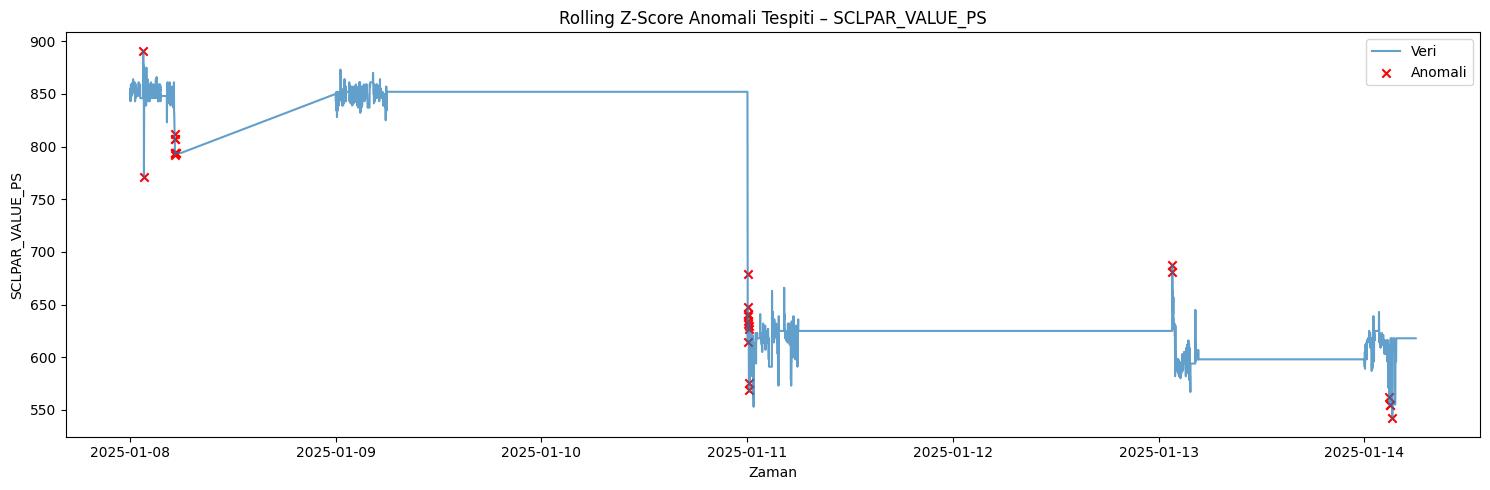


📌 SCLPAR_VALUE_PS için Toplam Anomali Sayısı: 28

🕒 Anomali Zamanları ve Değerleri:
                datetime            datetime  SCLPAR_VALUE_PS
93   2025-01-08 01:33:00 2025-01-08 01:33:00              891
98   2025-01-08 01:38:00 2025-01-08 01:38:00              771
312  2025-01-08 05:12:00 2025-01-08 05:12:00              812
313  2025-01-08 05:13:00 2025-01-08 05:13:00              807
314  2025-01-08 05:14:00 2025-01-08 05:14:00              807
315  2025-01-08 05:15:00 2025-01-08 05:15:00              792
316  2025-01-08 05:16:00 2025-01-08 05:16:00              794
317  2025-01-08 05:17:00 2025-01-08 05:17:00              794
318  2025-01-08 05:18:00 2025-01-08 05:18:00              794
319  2025-01-08 05:19:00 2025-01-08 05:19:00              794
320  2025-01-08 05:20:00 2025-01-08 05:20:00              794
723  2025-01-11 00:03:00 2025-01-11 00:03:00              679
724  2025-01-11 00:04:00 2025-01-11 00:04:00              614
725  2025-01-11 00:05:00 2025-01-11 00:05:00   

In [6]:
# Veriyi yükle
df = pd.read_csv("yeni_veri/520TonEnjPres_verileri_temizlenmis.csv")
# print(df.columns)
df['datetime'] = pd.to_datetime(df['datetime'])

# Hedef sütunlar
hedef_sutunlar = [
    'SCLPAR_VALUE_V1', 'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2',
    'SCLPAR_VALUE_L2', 'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3',
    'SCLPAR_VALUE_SM', 'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS'
]

# Her sütun için analiz yap ve sonuçları df'ye ekle
for sutun in hedef_sutunlar:
    print(f"\n\n🚩 Analiz Başlıyor: {sutun}")
    anomali_kolon_df = rolling_zscore_anomali_analiz(df, hedef_sutun=sutun, window=180, threshold=4)
    df = df.join(anomali_kolon_df)

In [7]:
df.shape

(1800, 22)

In [8]:
df.columns

Index(['kalip', 'cycleSayisi', 'makineKodu', 'SCLPAR_VALUE_V1',
       'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
       'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
       'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS', 'datetime',
       'SCLPAR_VALUE_V1_anomaly', 'SCLPAR_VALUE_P1_anomaly',
       'SCLPAR_VALUE_V2_anomaly', 'SCLPAR_VALUE_L2_anomaly',
       'SCLPAR_VALUE_TM_anomaly', 'SCLPAR_VALUE_P3_anomaly',
       'SCLPAR_VALUE_SM_anomaly', 'SCLPAR_VALUE_TR_anomaly',
       'SCLPAR_VALUE_PS_anomaly'],
      dtype='object')

In [9]:
df.head(3)

,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,...,datetime,SCLPAR_VALUE_V1_anomaly,SCLPAR_VALUE_P1_anomaly,SCLPAR_VALUE_V2_anomaly,SCLPAR_VALUE_L2_anomaly,SCLPAR_VALUE_TM_anomaly,SCLPAR_VALUE_P3_anomaly,SCLPAR_VALUE_SM_anomaly,SCLPAR_VALUE_TR_anomaly,SCLPAR_VALUE_PS_anomaly
0,1,54352,MAK1,0.10,5,2.79,54,948,378,169,...,2025-01-08 00:00:00,False,False,False,False,False,False,False,False,False
1,1,54353,MAK1,0.09,6,2.81,55,932,378,169,...,2025-01-08 00:01:00,False,False,False,False,False,False,False,False,False
2,1,54355,MAK1,0.09,6,2.91,55,940,378,168,...,2025-01-08 00:02:00,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

kalip                      0
cycleSayisi                0
makineKodu                 0
SCLPAR_VALUE_V1            0
SCLPAR_VALUE_P1            0
SCLPAR_VALUE_V2            0
SCLPAR_VALUE_L2            0
SCLPAR_VALUE_TM            0
SCLPAR_VALUE_P3            0
SCLPAR_VALUE_SM            0
SCLPAR_VALUE_TR            0
SCLPAR_VALUE_PS            0
datetime                   0
SCLPAR_VALUE_V1_anomaly    0
SCLPAR_VALUE_P1_anomaly    0
SCLPAR_VALUE_V2_anomaly    0
SCLPAR_VALUE_L2_anomaly    0
SCLPAR_VALUE_TM_anomaly    0
SCLPAR_VALUE_P3_anomaly    0
SCLPAR_VALUE_SM_anomaly    0
SCLPAR_VALUE_TR_anomaly    0
SCLPAR_VALUE_PS_anomaly    0
dtype: int64

### Aynı Anda Anomali Yoğunluğu

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ortak_anomali_analizi(df, datetime_col='datetime'):
    # Anomali sütunlarını seç
    anomaly_cols = [col for col in df.columns if col.endswith('_anomaly')]

    # Her satırda kaç sütunda anomali var?
    df['anomaly_count'] = df[anomaly_cols].sum(axis=1)

    # Genel özet
    print("🔢 Anomali Sayısı (aynı anda birden fazla sütun):")
    print(df['anomaly_count'].value_counts().sort_index())

    # Zaman serisi grafiği
    plt.figure(figsize=(15, 5))
    plt.plot(df[datetime_col], df['anomaly_count'], label='Anomali Sayısı', color='orange', alpha=0.7)
    plt.title("Zaman Serisinde Aynı Anda Görülen Anomali Sayısı")
    plt.xlabel("Zaman")
    plt.ylabel("Anomali Sayısı")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Isı haritası (Saat ve Gün bazlı yoğunluk)
    df['hour'] = pd.to_datetime(df[datetime_col]).dt.hour
    df['day'] = pd.to_datetime(df[datetime_col]).dt.date

    pivot = df.pivot_table(index='hour', columns='day', values='anomaly_count', aggfunc='sum', fill_value=0)

    plt.figure(figsize=(15, 6))
    sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.1, linecolor='gray', annot=False)
    plt.title("Saat ve Gün Bazlı Anomali Yoğunluğu (Aynı Anda Görülen)")
    plt.xlabel("Gün")
    plt.ylabel("Saat")
    plt.tight_layout()
    plt.show()

    return df[['datetime', 'anomaly_count']]


🔢 Anomali Sayısı (aynı anda birden fazla sütun):
anomaly_count
0    1718
1      36
2      30
3       4
4       6
5       6
Name: count, dtype: int64


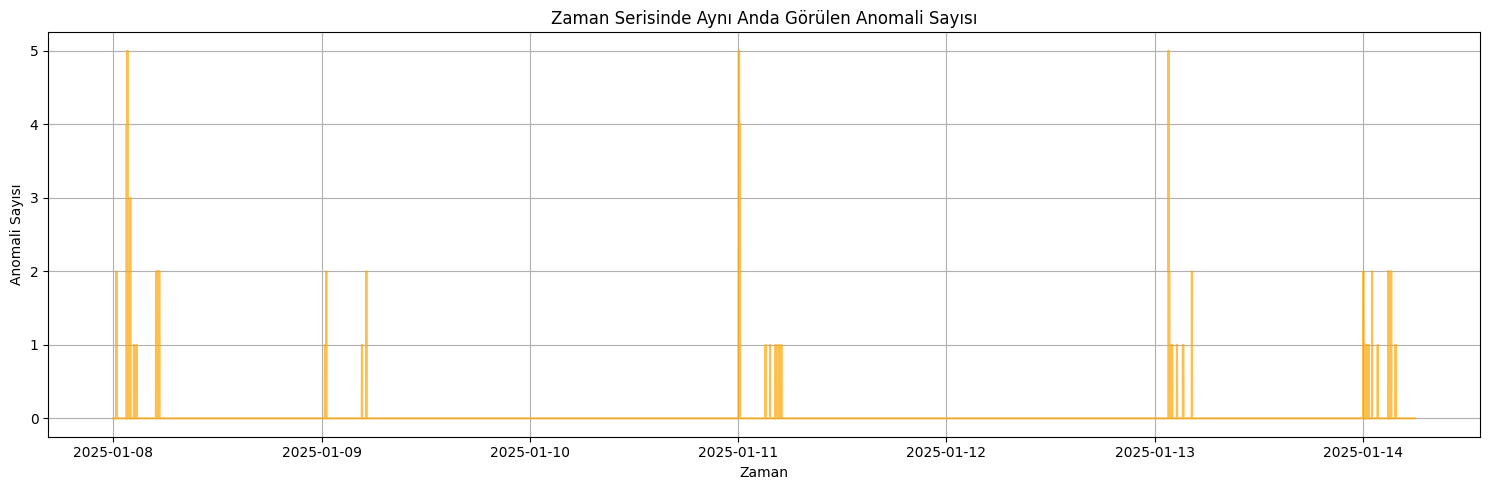

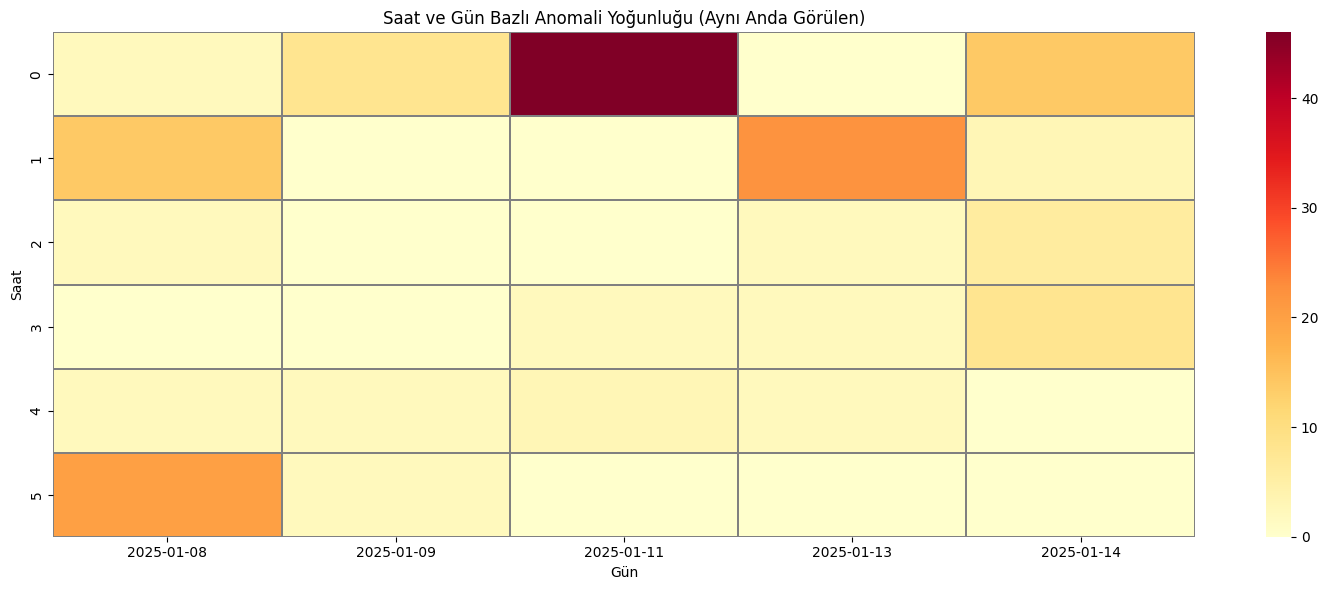

In [12]:
# Fonksiyonu çağırmak için:
ortak_anomali_df = ortak_anomali_analizi(df, datetime_col='datetime')


### Anomali Korelasyon Matrisi

In [13]:
# Aşağıdaki kod bloğu, _anomaly ile biten sütunları alır, bunların Pearson korelasyon matrisini oluşturur ve bir ısı haritası (heatmap) olarak görselleştirir.

import matplotlib.pyplot as plt
import seaborn as sns

def anomali_korelasyon_heatmap(df):
    # Sadece anomaly sütunlarını filtrele
    anomaly_cols = [col for col in df.columns if col.endswith('_anomaly')]

    # Eğer anomaly sütunu yoksa uyar
    if not anomaly_cols:
        print("Anomali sütunu bulunamadı.")
        return

    # Korelasyon matrisi
    corr_matrix = df[anomaly_cols].corr()

    # Görselleştirme
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title("📊 Anomali Korelasyon Matrisi (Pearson)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return corr_matrix


C:\Users\havva\AppData\Local\Temp\ipykernel_12764\2285916158.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


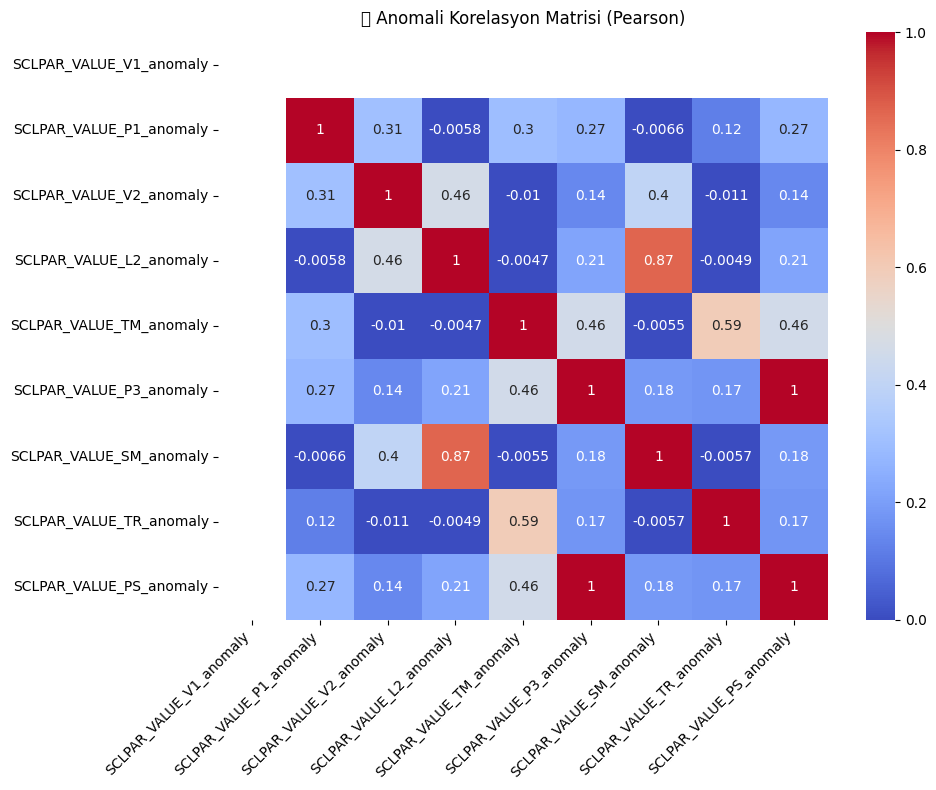

,SCLPAR_VALUE_V1_anomaly,SCLPAR_VALUE_P1_anomaly,SCLPAR_VALUE_V2_anomaly,SCLPAR_VALUE_L2_anomaly,SCLPAR_VALUE_TM_anomaly,SCLPAR_VALUE_P3_anomaly,SCLPAR_VALUE_SM_anomaly,SCLPAR_VALUE_TR_anomaly,SCLPAR_VALUE_PS_anomaly
SCLPAR_VALUE_V1_anomaly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCLPAR_VALUE_P1_anomaly,NaN,1.000000,0.308129,-0.005754,0.299335,0.274914,-0.006646,0.117837,0.274914
SCLPAR_VALUE_V2_anomaly,NaN,0.308129,1.000000,0.461491,-0.010292,0.142183,0.398730,-0.010718,0.142183
SCLPAR_VALUE_L2_anomaly,NaN,-0.005754,0.461491,1.000000,-0.004750,0.214983,0.865784,-0.004946,0.214983
SCLPAR_VALUE_TM_anomaly,NaN,0.299335,-0.010292,-0.004750,1.000000,0.455082,-0.005486,0.594865,0.455082
SCLPAR_VALUE_P3_anomaly,NaN,0.274914,0.142183,0.214983,0.455082,1.000000,0.184749,0.172916,1.000000
SCLPAR_VALUE_SM_anomaly,NaN,-0.006646,0.398730,0.865784,-0.005486,0.184749,1.000000,-0.005713,0.184749
SCLPAR_VALUE_TR_anomaly,NaN,0.117837,-0.010718,-0.004946,0.594865,0.172916,-0.005713,1.000000,0.172916
SCLPAR_VALUE_PS_anomaly,NaN,0.274914,0.142183,0.214983,0.455082,1.000000,0.184749,0.172916,1.000000


In [14]:
anomali_korelasyon_heatmap(df)

### Anomali Etkisi – Korelasyon Analizi

In [15]:
# Belirli bir metrik sütunun, diğer sayısal sütunlarla korelasyonunu gösterir:
import seaborn as sns
import matplotlib.pyplot as plt

def korelasyon_heatmap(df, hedef_sutun, haric_tutulacaklar=None):
    """
    Verilen hedef sütunun diğer sayısal sütunlarla korelasyonunu heatmap ile gösterir.
    """
    haric_tutulacaklar = haric_tutulacaklar or []
    sayisal_df = df.select_dtypes(include='number')
    
    if hedef_sutun not in sayisal_df.columns:
        raise ValueError(f"Hedef sütun '{hedef_sutun}' sayısal değil veya DataFrame'de yok.")
    
    # Hedef sütunu hariç tutulanlardan çıkar (gerekirse)
    haric_korelasyonlar = sayisal_df.corr()[[hedef_sutun]].drop(index=hedef_sutun)
    haric_korelasyonlar = haric_korelasyonlar[~haric_korelasyonlar.index.isin(haric_tutulacaklar)]

    # Dinamik çizim
    plt.figure(figsize=(4, len(haric_korelasyonlar) * 0.5 + 1))
    sns.heatmap(haric_korelasyonlar, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title(f"'{hedef_sutun}' ile Korelasyonlar", fontsize=14)
    plt.tight_layout()
    plt.show()


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def anomali_etki_analizi(df, anomaly_col, korelasyon_eşiği=0.4, haric_tutulacaklar=None):
    """
    Belirli bir anomaly sütunu için, anomaly zamanlarında diğer korelasyonu yüksek metrik sütunların 
    ortalama ve standart sapma değişimini karşılaştırır. Hem yazdırır hem grafikle gösterir.
    """
    haric_tutulacaklar = haric_tutulacaklar or []
    sayisal_df = df.select_dtypes(include='number')
    metrik_sutun = anomaly_col.replace('_anomaly', '')

    # Korelasyonlara göre filtrele
    corr_matrix = sayisal_df.corr()
    ilgili_sutunlar = corr_matrix[metrik_sutun][
        (corr_matrix[metrik_sutun].abs() >= korelasyon_eşiği) & 
        (corr_matrix[metrik_sutun].abs() < 1)
    ].index.difference(haric_tutulacaklar).tolist()

    if not ilgili_sutunlar:
        print(f"⚠️ '{metrik_sutun}' ile korelasyonu {korelasyon_eşiği} üzerinde olan başka sütun bulunamadı.")
        return

    anomali_df = df[df[anomaly_col] == True]
    normal_df = df[df[anomaly_col] == False]

    farklar = []
    print(f"\n📊 Anomali Etkisi – '{metrik_sutun}' Anomalisi Olduğunda:\n")
    for sutun in ilgili_sutunlar:
        ort_anomali = anomali_df[sutun].mean()
        ort_normal = normal_df[sutun].mean()
        std_anomali = anomali_df[sutun].std()
        std_normal = normal_df[sutun].std()
        fark_ort = ort_anomali - ort_normal
        fark_std = std_anomali - std_normal

        print(f"• {sutun}: Anomali Ort: {ort_anomali:.2f} | Normal Ort: {ort_normal:.2f} | Fark: {fark_ort:+.2f} | Std Fark: {fark_std:+.2f}")
        farklar.append({
            'kolon': sutun,
            'fark_mean': fark_ort,
            'fark_std': fark_std
        })

    fark_df = pd.DataFrame(farklar).set_index("kolon")

    # Görselleştirme
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(fark_df[['fark_mean']], cmap='RdBu', center=0, annot=True, fmt=".1f", ax=axes[0])
    axes[0].set_title("📉 Ortalama Farkları (Anomali - Normal)")
    axes[0].set_xlabel("Fark Tipi")

    sns.heatmap(fark_df[['fark_std']], cmap='RdBu', center=0, annot=True, fmt=".1f", ax=axes[1])
    axes[1].set_title("📈 Standart Sapma Farkları")
    axes[1].set_xlabel("Fark Tipi")

    plt.tight_layout()
    plt.show()


In [17]:
df.columns

Index(['kalip', 'cycleSayisi', 'makineKodu', 'SCLPAR_VALUE_V1',
       'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
       'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
       'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS', 'datetime',
       'SCLPAR_VALUE_V1_anomaly', 'SCLPAR_VALUE_P1_anomaly',
       'SCLPAR_VALUE_V2_anomaly', 'SCLPAR_VALUE_L2_anomaly',
       'SCLPAR_VALUE_TM_anomaly', 'SCLPAR_VALUE_P3_anomaly',
       'SCLPAR_VALUE_SM_anomaly', 'SCLPAR_VALUE_TR_anomaly',
       'SCLPAR_VALUE_PS_anomaly', 'anomaly_count', 'hour', 'day'],
      dtype='object')


------------------------------------------------------------
📌 Analiz Başlıyor: SCLPAR_VALUE_P1 (35 anomali)


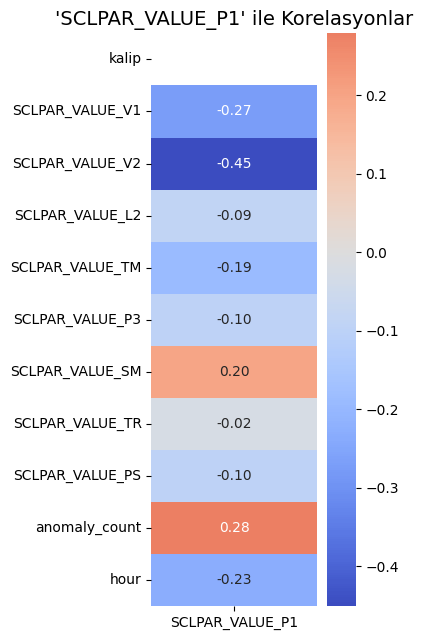


📊 Anomali Etkisi – 'SCLPAR_VALUE_P1' Anomalisi Olduğunda:

• SCLPAR_VALUE_V2: Anomali Ort: 2.89 | Normal Ort: 3.03 | Fark: -0.14 | Std Fark: +0.05


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3609851689.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


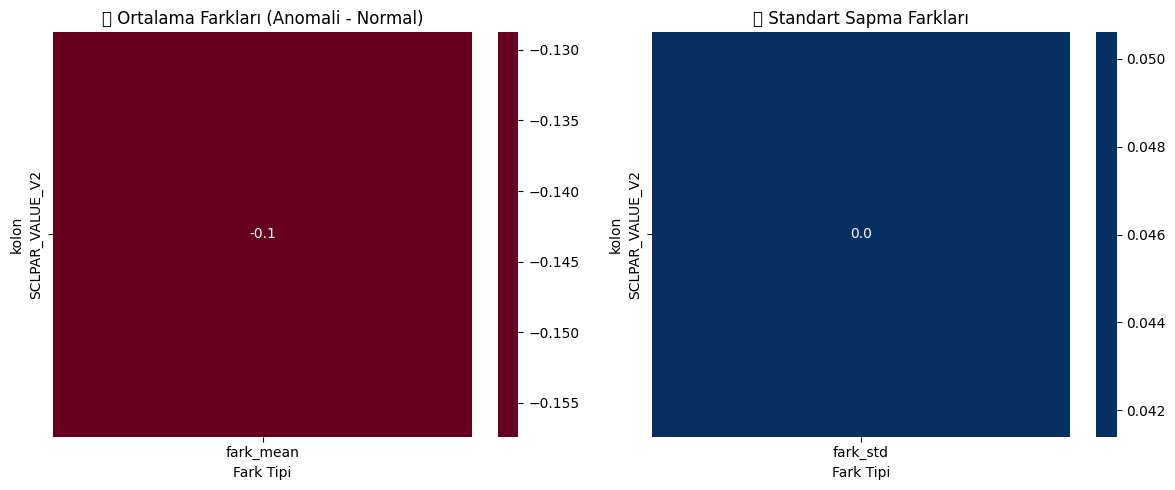


------------------------------------------------------------
📌 Analiz Başlıyor: SCLPAR_VALUE_V2 (14 anomali)


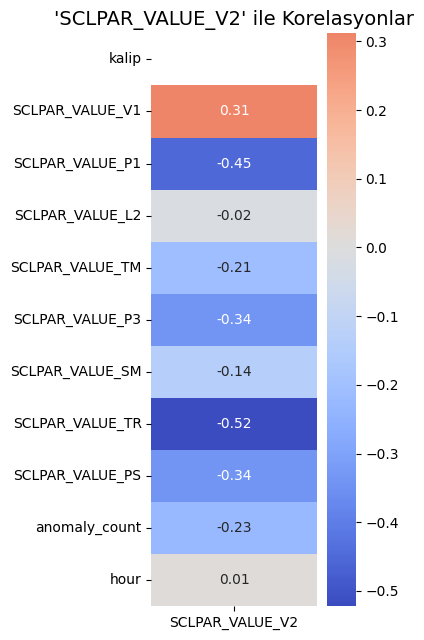


📊 Anomali Etkisi – 'SCLPAR_VALUE_V2' Anomalisi Olduğunda:

• SCLPAR_VALUE_P1: Anomali Ort: 7.00 | Normal Ort: 5.39 | Fark: +1.61 | Std Fark: +1.52
• SCLPAR_VALUE_P3: Anomali Ort: 296.21 | Normal Ort: 314.27 | Fark: -18.05 | Std Fark: -21.45
• SCLPAR_VALUE_PS: Anomali Ort: 665.93 | Normal Ort: 706.68 | Fark: -40.75 | Std Fark: -48.18
• SCLPAR_VALUE_TR: Anomali Ort: 832.57 | Normal Ort: 926.52 | Fark: -93.95 | Std Fark: -25.55
• SCLPAR_VALUE_V1: Anomali Ort: 0.09 | Normal Ort: 0.10 | Fark: -0.00 | Std Fark: -0.00


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3609851689.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


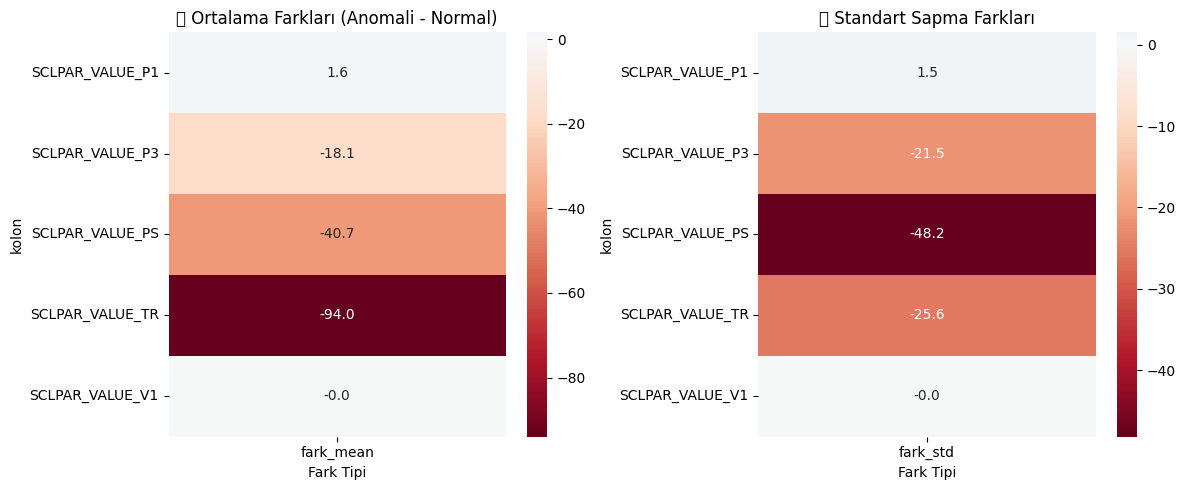


------------------------------------------------------------
📌 Analiz Başlıyor: SCLPAR_VALUE_L2 (3 anomali)


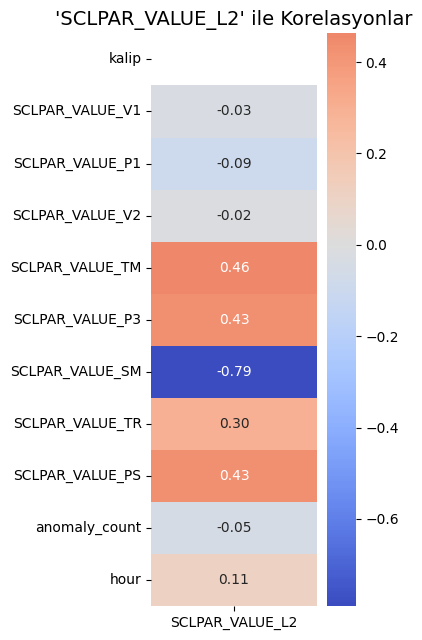


📊 Anomali Etkisi – 'SCLPAR_VALUE_L2' Anomalisi Olduğunda:

• SCLPAR_VALUE_P3: Anomali Ort: 341.67 | Normal Ort: 314.08 | Fark: +27.59 | Std Fark: -16.37
• SCLPAR_VALUE_PS: Anomali Ort: 768.33 | Normal Ort: 706.26 | Fark: +62.08 | Std Fark: -36.62
• SCLPAR_VALUE_SM: Anomali Ort: 174.67 | Normal Ort: 167.83 | Fark: +6.84 | Std Fark: +0.78
• SCLPAR_VALUE_TM: Anomali Ort: 708.00 | Normal Ort: 518.52 | Fark: +189.48 | Std Fark: +35.91


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3609851689.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


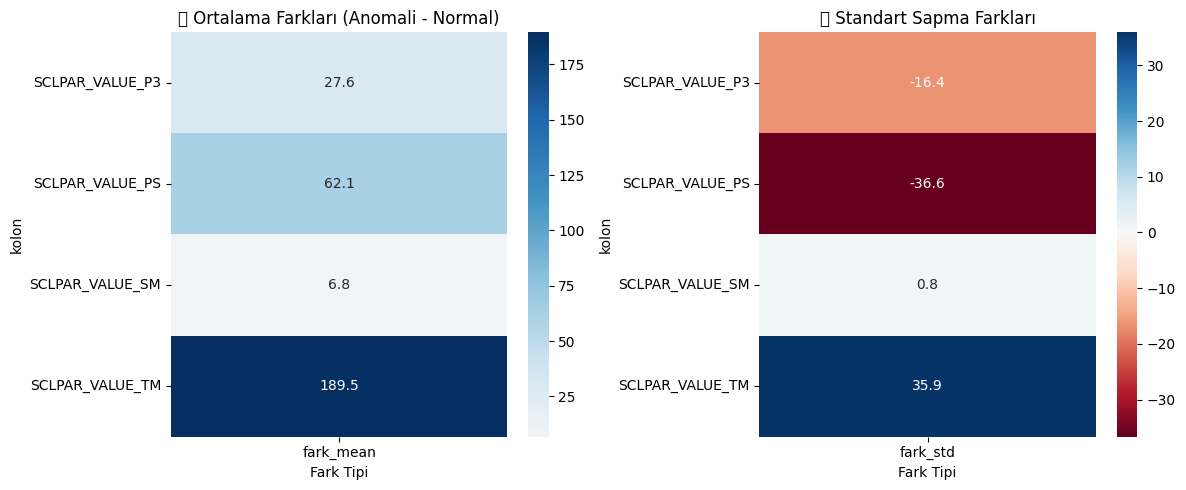


------------------------------------------------------------
📌 Analiz Başlıyor: SCLPAR_VALUE_TM (24 anomali)


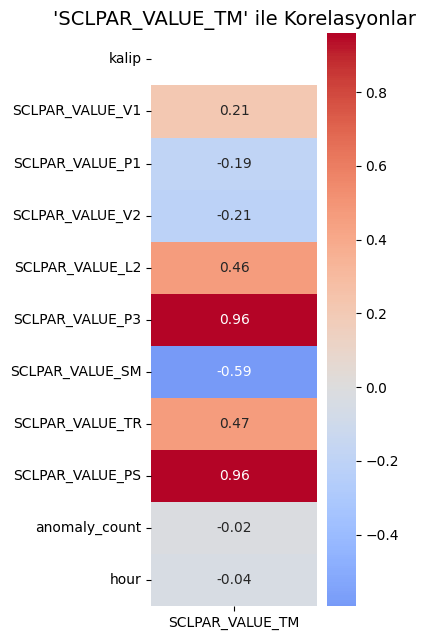


📊 Anomali Etkisi – 'SCLPAR_VALUE_TM' Anomalisi Olduğunda:

• SCLPAR_VALUE_L2: Anomali Ort: 56.58 | Normal Ort: 56.32 | Fark: +0.27 | Std Fark: +0.42
• SCLPAR_VALUE_P3: Anomali Ort: 320.71 | Normal Ort: 314.04 | Fark: +6.67 | Std Fark: +1.93
• SCLPAR_VALUE_PS: Anomali Ort: 721.38 | Normal Ort: 706.16 | Fark: +15.22 | Std Fark: +4.37
• SCLPAR_VALUE_SM: Anomali Ort: 167.25 | Normal Ort: 167.85 | Fark: -0.60 | Std Fark: +0.44
• SCLPAR_VALUE_TR: Anomali Ort: 1104.33 | Normal Ort: 923.38 | Fark: +180.95 | Std Fark: +270.80


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3609851689.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


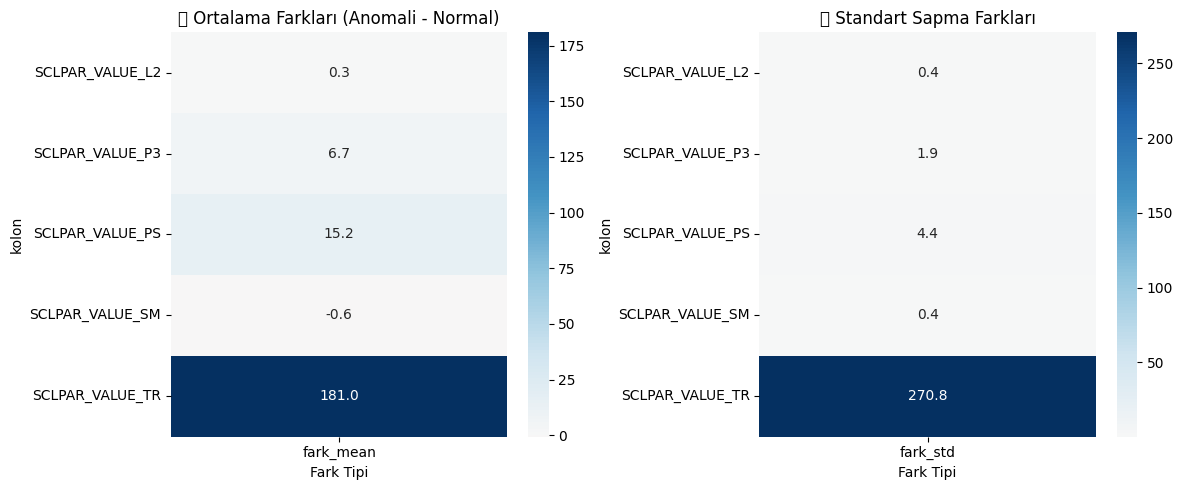


------------------------------------------------------------
📌 Analiz Başlıyor: SCLPAR_VALUE_P3 (28 anomali)


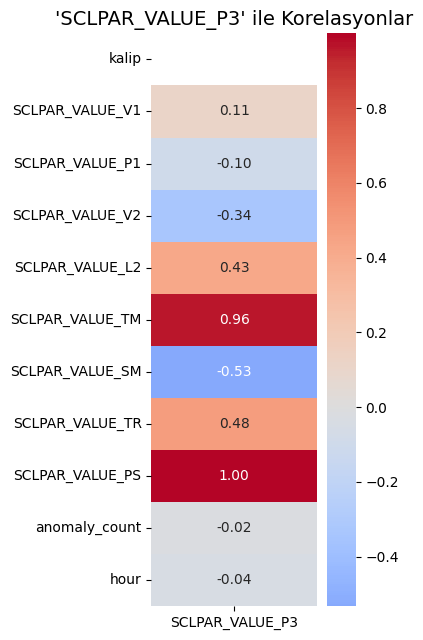


📊 Anomali Etkisi – 'SCLPAR_VALUE_P3' Anomalisi Olduğunda:

• SCLPAR_VALUE_L2: Anomali Ort: 56.21 | Normal Ort: 56.32 | Fark: -0.11 | Std Fark: +0.75
• SCLPAR_VALUE_PS: Anomali Ort: 690.07 | Normal Ort: 706.62 | Fark: -16.55 | Std Fark: -13.46
• SCLPAR_VALUE_SM: Anomali Ort: 167.82 | Normal Ort: 167.84 | Fark: -0.02 | Std Fark: +0.79
• SCLPAR_VALUE_TM: Anomali Ort: 463.71 | Normal Ort: 519.71 | Fark: -55.99 | Std Fark: +35.65
• SCLPAR_VALUE_TR: Anomali Ort: 880.00 | Normal Ort: 926.51 | Fark: -46.51 | Std Fark: -1.81
• SCLPAR_VALUE_V2: Anomali Ort: 2.91 | Normal Ort: 3.03 | Fark: -0.12 | Std Fark: +0.05


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3609851689.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


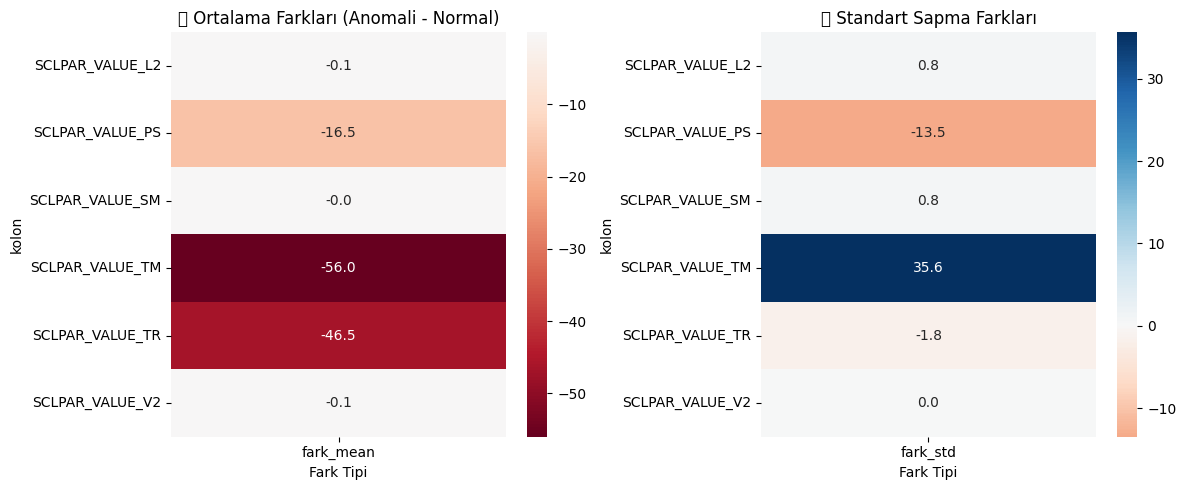


------------------------------------------------------------
📌 Analiz Başlıyor: SCLPAR_VALUE_SM (4 anomali)


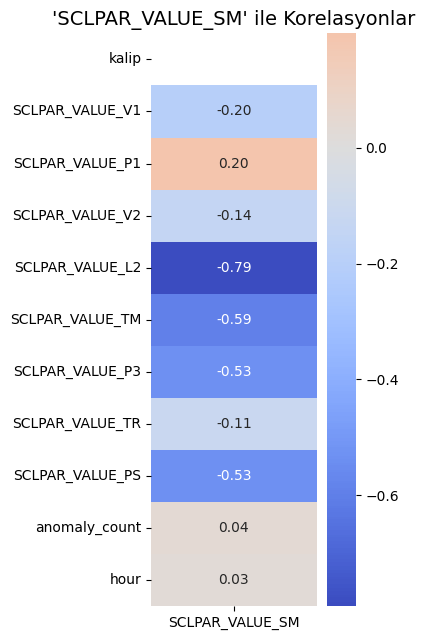


📊 Anomali Etkisi – 'SCLPAR_VALUE_SM' Anomalisi Olduğunda:

• SCLPAR_VALUE_L2: Anomali Ort: 51.25 | Normal Ort: 56.33 | Fark: -5.08 | Std Fark: +1.95
• SCLPAR_VALUE_P3: Anomali Ort: 323.50 | Normal Ort: 314.10 | Fark: +9.40 | Std Fark: -5.15
• SCLPAR_VALUE_PS: Anomali Ort: 727.50 | Normal Ort: 706.31 | Fark: +21.19 | Std Fark: -11.58
• SCLPAR_VALUE_TM: Anomali Ort: 558.00 | Normal Ort: 518.75 | Fark: +39.25 | Std Fark: +67.05


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3609851689.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


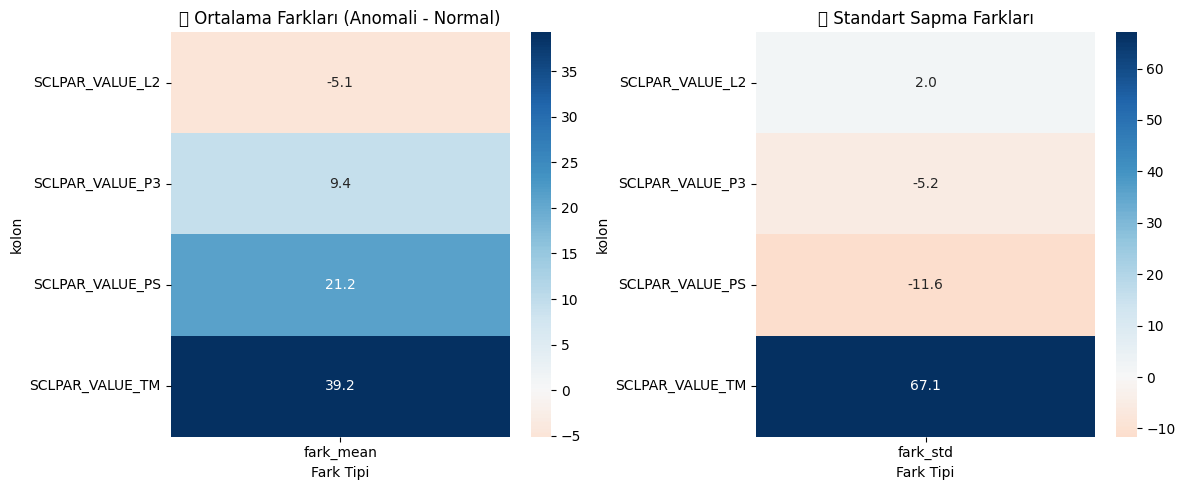


------------------------------------------------------------
📌 Analiz Başlıyor: SCLPAR_VALUE_TR (26 anomali)


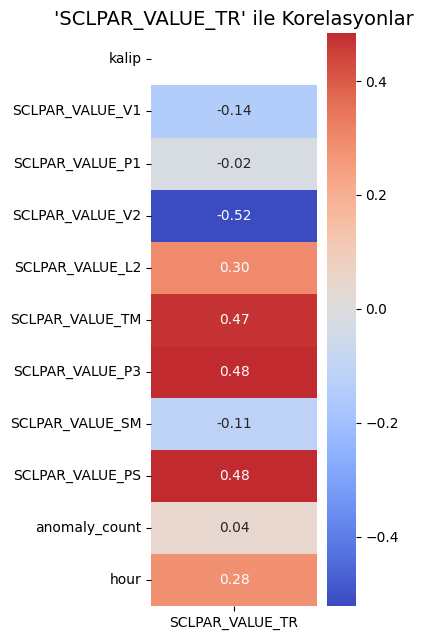


📊 Anomali Etkisi – 'SCLPAR_VALUE_TR' Anomalisi Olduğunda:

• SCLPAR_VALUE_P3: Anomali Ort: 315.38 | Normal Ort: 314.11 | Fark: +1.28 | Std Fark: +2.00
• SCLPAR_VALUE_PS: Anomali Ort: 709.27 | Normal Ort: 706.32 | Fark: +2.95 | Std Fark: +4.62
• SCLPAR_VALUE_TM: Anomali Ort: 655.23 | Normal Ort: 516.84 | Fark: +138.39 | Std Fark: +251.35
• SCLPAR_VALUE_V2: Anomali Ort: 2.94 | Normal Ort: 3.03 | Fark: -0.09 | Std Fark: +0.00


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3609851689.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


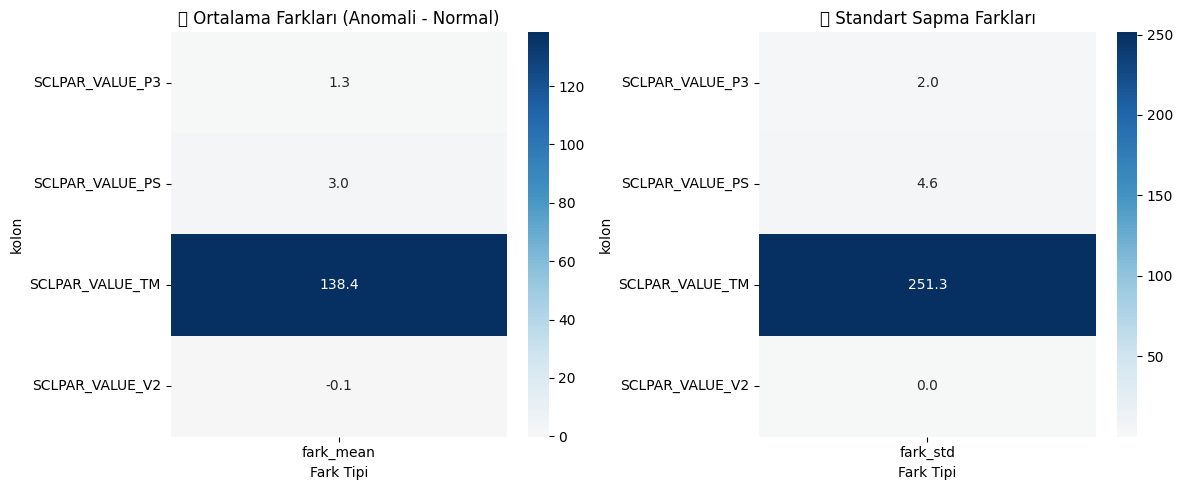


------------------------------------------------------------
📌 Analiz Başlıyor: SCLPAR_VALUE_PS (28 anomali)


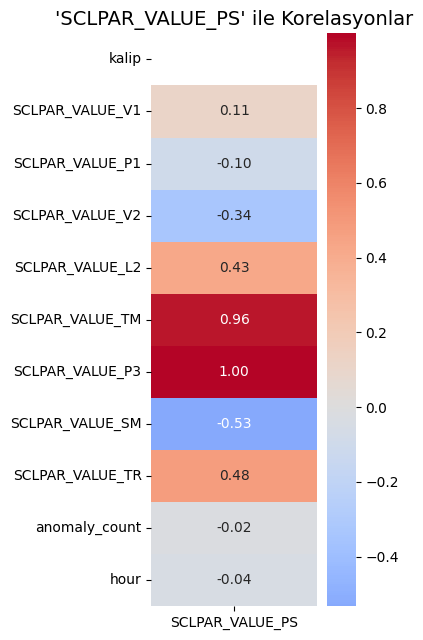


📊 Anomali Etkisi – 'SCLPAR_VALUE_PS' Anomalisi Olduğunda:

• SCLPAR_VALUE_L2: Anomali Ort: 56.21 | Normal Ort: 56.32 | Fark: -0.11 | Std Fark: +0.75
• SCLPAR_VALUE_P3: Anomali Ort: 306.86 | Normal Ort: 314.24 | Fark: -7.38 | Std Fark: -5.98
• SCLPAR_VALUE_SM: Anomali Ort: 167.82 | Normal Ort: 167.84 | Fark: -0.02 | Std Fark: +0.79
• SCLPAR_VALUE_TM: Anomali Ort: 463.71 | Normal Ort: 519.71 | Fark: -55.99 | Std Fark: +35.65
• SCLPAR_VALUE_TR: Anomali Ort: 880.00 | Normal Ort: 926.51 | Fark: -46.51 | Std Fark: -1.81
• SCLPAR_VALUE_V2: Anomali Ort: 2.91 | Normal Ort: 3.03 | Fark: -0.12 | Std Fark: +0.05


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3609851689.py:58: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


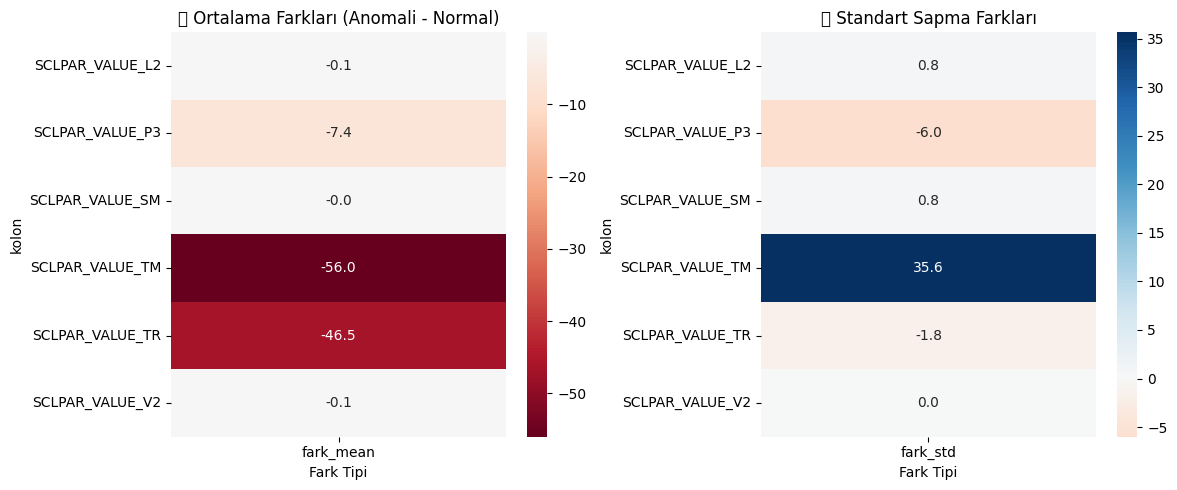

In [18]:
# Otomatik Anomali Etki Analizi Döngüsü 
anomaly_columns = [col for col in df.columns if col.endswith('_anomaly')]
haric_tut = ['cycleSayisi']

for anomaly_col in anomaly_columns:
    anomaly_count = df[anomaly_col].sum()
    
    if anomaly_count > 0:
        metrik_col = anomaly_col.replace('_anomaly', '')
        
        print("\n" + "-"*60)
        print(f"📌 Analiz Başlıyor: {metrik_col} ({anomaly_count} anomali)")
        
        # Korelasyon heatmap (cycleSayisi hariç)
        korelasyon_heatmap(df, metrik_col, haric_tutulacaklar=haric_tut)
        
        # Anomali etkisi analizi
        anomali_etki_analizi(df, anomaly_col, korelasyon_eşiği=0.3, haric_tutulacaklar=haric_tut)


### Etkileşim Tabanlı Uyarı Sistemi

In [19]:
# Veriyi yükleyelim
df = pd.read_csv("yeni_veri/520TonEnjPres_verileri_temizlenmis.csv")

In [20]:
def rolling_zscore_anomali(df, hedef_sutun, window=180, threshold=4, plot=False):
    df = df.copy()
    rolling_mean = df[hedef_sutun].rolling(window=window, min_periods=1).mean()
    rolling_std = df[hedef_sutun].rolling(window=window, min_periods=1).std()
    z_score = (df[hedef_sutun] - rolling_mean) / rolling_std
    anomaly_mask = z_score.abs() > threshold
    #df[f'{hedef_sutun}_zscore'] = z_score
    df[f'{hedef_sutun}_anomaly'] = anomaly_mask

    if plot:
        plt.figure(figsize=(15, 5))
        plt.plot(df.index, df[hedef_sutun], label='Veri', alpha=0.7)
        plt.scatter(df.index[anomaly_mask], df[hedef_sutun][anomaly_mask],
                    color='red', label='Anomali', marker='x')
        plt.title(f"Rolling Z-Score Anomali Tespiti – {hedef_sutun}")
        plt.xlabel("Zaman")
        plt.ylabel(hedef_sutun)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return df, anomaly_mask


In [21]:
def ortak_uyari_sistemi(df, sensor_etkilesim, window=180, threshold=4):
    genel_uyarilar = []

    # Her sensör için rolling zscore ile anomaly mask oluştur
    anomaly_masks = {}
    for hedef_sutun in sensor_etkilesim:
        df, mask = rolling_zscore_anomali(df, hedef_sutun, window=window, threshold=threshold, plot=False)
        anomaly_masks[hedef_sutun] = mask

    anomaly_counts = []
    
    for i in df.index:
        satir_uyarilari = []
        anomaly_count = 0

        for hedef_sutun, etkili_sutunlar in sensor_etkilesim.items():
            if anomaly_masks[hedef_sutun].loc[i]:
                anomaly_count += 1
                kritik = False
                for etkili in etkili_sutunlar:
                    normal_vals = df.loc[~anomaly_masks[hedef_sutun], etkili]
                    ort, std = normal_vals.mean(), normal_vals.std()
                    if (df.at[i, etkili] > ort + std) or (df.at[i, etkili] < ort - std):
                        kritik = True
                if kritik:
                    satir_uyarilari.append(f"🔴 {hedef_sutun} anomalisi + etkili sapma")
                else:
                    satir_uyarilari.append(f"🟡 {hedef_sutun} anomalisi (etki sınırlı)")

        anomaly_counts.append(anomaly_count)

        if not satir_uyarilari:
            genel_uyarilar.append("🟢 Normal")
        else:
            genel_uyarilar.append(" | ".join(satir_uyarilari))

    df["GENEL_UYARI"] = genel_uyarilar
    df["anomaly_count"] = anomaly_counts
    return df   

In [22]:
df.head()

,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime
0,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:00
1,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:00
2,1,54355,MAK1,0.09,6,2.91,55,940,378,168,952,850,2025-01-08 00:02:00
3,1,54356,MAK1,0.10,6,2.97,55,920,380,169,928,855,2025-01-08 00:03:00
4,1,54358,MAK1,0.10,6,2.92,55,940,375,169,952,843,2025-01-08 00:04:00


In [23]:
# "Anomali Etkisi – Korelasyon Analizi" sonuçlarına dayanarak  çıkarıldı 
sensor_etkilesim = {
    "SCLPAR_VALUE_P1": ["SCLPAR_VALUE_V2"],  # V2 ortalama azalmış
    "SCLPAR_VALUE_V2": ["SCLPAR_VALUE_TR", "SCLPAR_VALUE_PS", "SCLPAR_VALUE_P3"],  # TR -94, PS ve P3 düşüş
    "SCLPAR_VALUE_TM": ["SCLPAR_VALUE_TR", "SCLPAR_VALUE_PS", "SCLPAR_VALUE_P3"],  # TR +181, PS ve P3 artış
    "SCLPAR_VALUE_P3": ["SCLPAR_VALUE_TM", "SCLPAR_VALUE_TR", "SCLPAR_VALUE_PS"],  # TM -56, TR -46.5, PS düşüş
    "SCLPAR_VALUE_TR": ["SCLPAR_VALUE_TM", "SCLPAR_VALUE_PS", "SCLPAR_VALUE_P3"],  # TM +138, PS ve P3 artış
    "SCLPAR_VALUE_PS": ["SCLPAR_VALUE_TM", "SCLPAR_VALUE_TR", "SCLPAR_VALUE_P3"],  # TM -56, TR -46.5, P3 düşüş
    "SCLPAR_VALUE_L2": ["SCLPAR_VALUE_TM", "SCLPAR_VALUE_PS", "SCLPAR_VALUE_P3"],  # TM +189.5, PS ve P3 artış
    "SCLPAR_VALUE_SM": ["SCLPAR_VALUE_TM", "SCLPAR_VALUE_PS", "SCLPAR_VALUE_P3"],  # TM +39.2, PS ve P3 artış
}


In [24]:
df_uyarili = ortak_uyari_sistemi(df, sensor_etkilesim)
df_uyarili["GENEL_UYARI"].value_counts()

GENEL_UYARI
🟢 Normal                                                                                                                                                                                                                          1718
🟡 SCLPAR_VALUE_P1 anomalisi (etki sınırlı)                                                                                                                                                                                          16
🔴 SCLPAR_VALUE_P3 anomalisi + etkili sapma | 🔴 SCLPAR_VALUE_PS anomalisi + etkili sapma                                                                                                                                             13
🔴 SCLPAR_VALUE_TR anomalisi + etkili sapma                                                                                                                                                                                           9
🔴 SCLPAR_VALUE_TM anomalisi + etkili sapma | 🔴 SCLPAR_VALUE_TR a

In [25]:
anormal_sayi = (df_uyarili["GENEL_UYARI"] != "🟢 Normal").sum()
print(f"🛑 Anormal satır sayısı: {anormal_sayi}")

🛑 Anormal satır sayısı: 82


In [26]:
# TEST
df_uyarili1 = ortak_uyari_sistemi(df, sensor_etkilesim)

# print(df_uyarili1["datetime"].dtype)  # çıktısı object ise çevrilmeli: 
df_uyarili1["datetime"] = pd.to_datetime(df_uyarili1["datetime"])

tarih_saat = pd.Timestamp("2025-01-08 00:22:00")
uyari = df_uyarili1.loc[df_uyarili1["datetime"] == tarih_saat, "GENEL_UYARI"].values[0]
print(uyari)


🔴 SCLPAR_VALUE_TM anomalisi + etkili sapma | 🔴 SCLPAR_VALUE_TR anomalisi + etkili sapma


## 🧩 Arıza kümeleri (Anomali Türlerini Gruplandırılı)

In [27]:
# Veriyi yükleyelim
df = pd.read_csv("yeni_veri/520TonEnjPres_verileri_temizlenmis.csv")

In [28]:
## Veriye etkileşim tabanlı uyarı sistemi uygulanır
df = ortak_uyari_sistemi(df, sensor_etkilesim)

### Anomali Snapshot'ları Oluşturulur

- Her satırda en az 1 anomali varsa, o satırı anomali snapshot kabul edebiliriz:

In [29]:
# 1. Sensör kolonlarını seç
sensor_cols = [
    'SCLPAR_VALUE_V1', 'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
    'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
    'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS'
]

# 2. Anomali snapshotlarını al
anomali_df = df[df["anomaly_count"] > 0][sensor_cols].copy()

In [30]:
anomali_df.shape

(82, 9)

## 2. PCA + KMeans ile Anomali Kümeleme

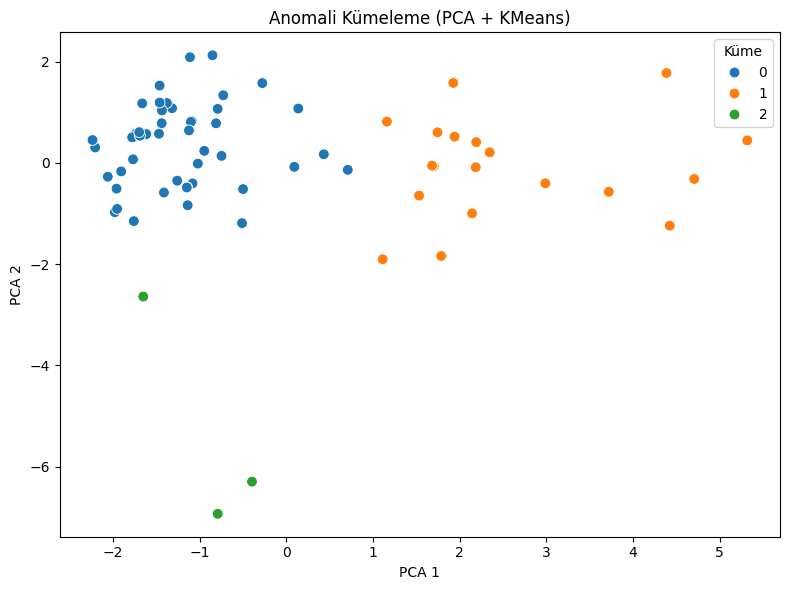

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veriyi standardize et
scaler = StandardScaler()
anomali_scaled = scaler.fit_transform(anomali_df)

# 2. PCA ile 2 boyuta indir
pca = PCA(n_components=2)
pca_result = pca.fit_transform(anomali_scaled)

# 3. KMeans ile kümeleme (örnek: 3 küme)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# 4. Küme sonuçlarını dataframe'e ekle
anomali_df['cluster'] = clusters
anomali_df['pca_1'] = pca_result[:, 0]
anomali_df['pca_2'] = pca_result[:, 1]

# 5. Görselleştir
plt.figure(figsize=(8, 6))
sns.scatterplot(data=anomali_df, x='pca_1', y='pca_2', hue='cluster', palette='tab10', s=60)
plt.title("Anomali Kümeleme (PCA + KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Küme")
plt.tight_layout()
plt.show()


Grafikte 3 kümeye ayrılmış anomali örneklerini net şekilde görebiliyoruz:
- Küme 0 (mavi): En yoğun ve ana grup gibi duruyor.
- Küme 1 (turuncu): Açıkça farklı bir dağılıma sahip.
- Küme 2 (yeşil): Az sayıda ama oldukça uçta (outlier gibi), belki ciddi arızalar?

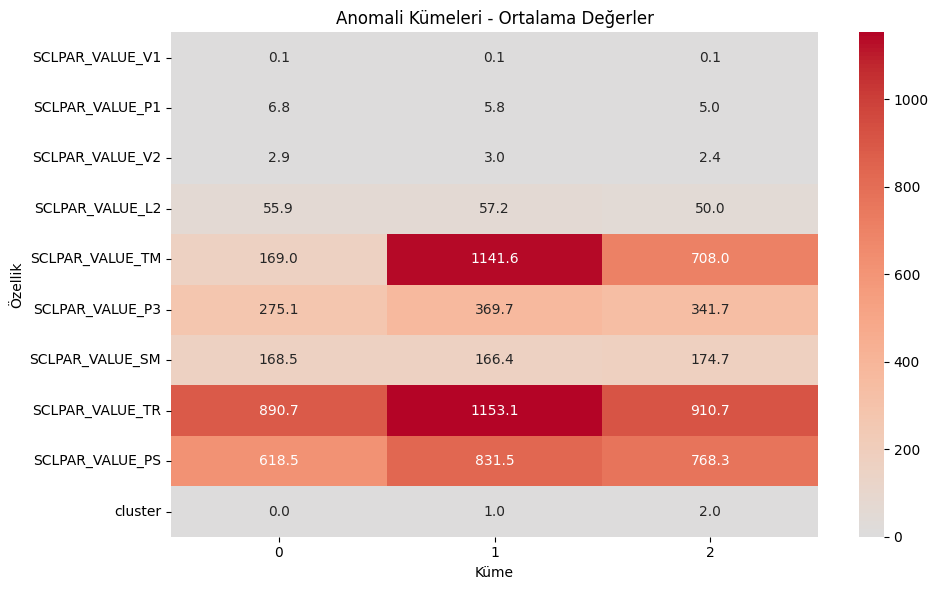

In [32]:
# Sadece sayısal kolonları analiz et
numeric_cols = [col for col in anomali_df.columns if anomali_df[col].dtype != 'object' and col not in ['pca_1', 'pca_2']]

# Küme bazlı ortalama değerler
cluster_summary = anomali_df.groupby("cluster")[numeric_cols].mean().T

# Isı haritası ile görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Anomali Kümeleri - Ortalama Değerler")
plt.ylabel("Özellik")
plt.xlabel("Küme")
plt.tight_layout()
plt.show()

In [33]:
df.columns

Index(['kalip', 'cycleSayisi', 'makineKodu', 'SCLPAR_VALUE_V1',
       'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
       'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
       'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS', 'datetime',
       'SCLPAR_VALUE_P1_anomaly', 'SCLPAR_VALUE_V2_anomaly',
       'SCLPAR_VALUE_TM_anomaly', 'SCLPAR_VALUE_P3_anomaly',
       'SCLPAR_VALUE_TR_anomaly', 'SCLPAR_VALUE_PS_anomaly',
       'SCLPAR_VALUE_L2_anomaly', 'SCLPAR_VALUE_SM_anomaly', 'GENEL_UYARI',
       'anomaly_count'],
      dtype='object')

In [34]:
anomali_df.head(5)

,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,cluster,pca_1,pca_2
22,0.09,5,2.80,55,1056,384,169,1064,864,1,1.785216,-1.837821
93,0.10,5,2.99,61,1132,396,163,1140,891,1,4.385451,1.772768
98,0.10,5,2.29,49,1000,343,176,1016,771,2,-0.398118,-6.292296
115,0.10,5,2.93,57,1640,389,168,1652,875,1,4.422922,-1.239277
118,0.09,5,2.19,48,912,376,176,924,846,2,-0.793540,-6.927161


In [35]:
# 1. cluster kolonunu anomaly_type olarak yeniden adlandır
anomali_df["anomaly_type"] = anomali_df["cluster"]

# 2. PCA kolonlarını ve cluster'ı çıkart, sadece anomaly_type kalacak
anomali_snapshot = anomali_df[["anomaly_type"]]

# 3. index'leri kullanarak orijinal df'ye ekle
df = df.join(anomali_snapshot, how="left")

In [36]:
anomali_df.columns

Index(['SCLPAR_VALUE_V1', 'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2',
       'SCLPAR_VALUE_L2', 'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3',
       'SCLPAR_VALUE_SM', 'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS', 'cluster',
       'pca_1', 'pca_2', 'anomaly_type'],
      dtype='object')

In [37]:
df.columns

Index(['kalip', 'cycleSayisi', 'makineKodu', 'SCLPAR_VALUE_V1',
       'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
       'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
       'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS', 'datetime',
       'SCLPAR_VALUE_P1_anomaly', 'SCLPAR_VALUE_V2_anomaly',
       'SCLPAR_VALUE_TM_anomaly', 'SCLPAR_VALUE_P3_anomaly',
       'SCLPAR_VALUE_TR_anomaly', 'SCLPAR_VALUE_PS_anomaly',
       'SCLPAR_VALUE_L2_anomaly', 'SCLPAR_VALUE_SM_anomaly', 'GENEL_UYARI',
       'anomaly_count', 'anomaly_type'],
      dtype='object')

In [38]:
df["anomaly_type"].value_counts(dropna=False)

anomaly_type
NaN    1718
0.0      54
1.0      25
2.0       3
Name: count, dtype: int64

C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3774090901.py:17: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


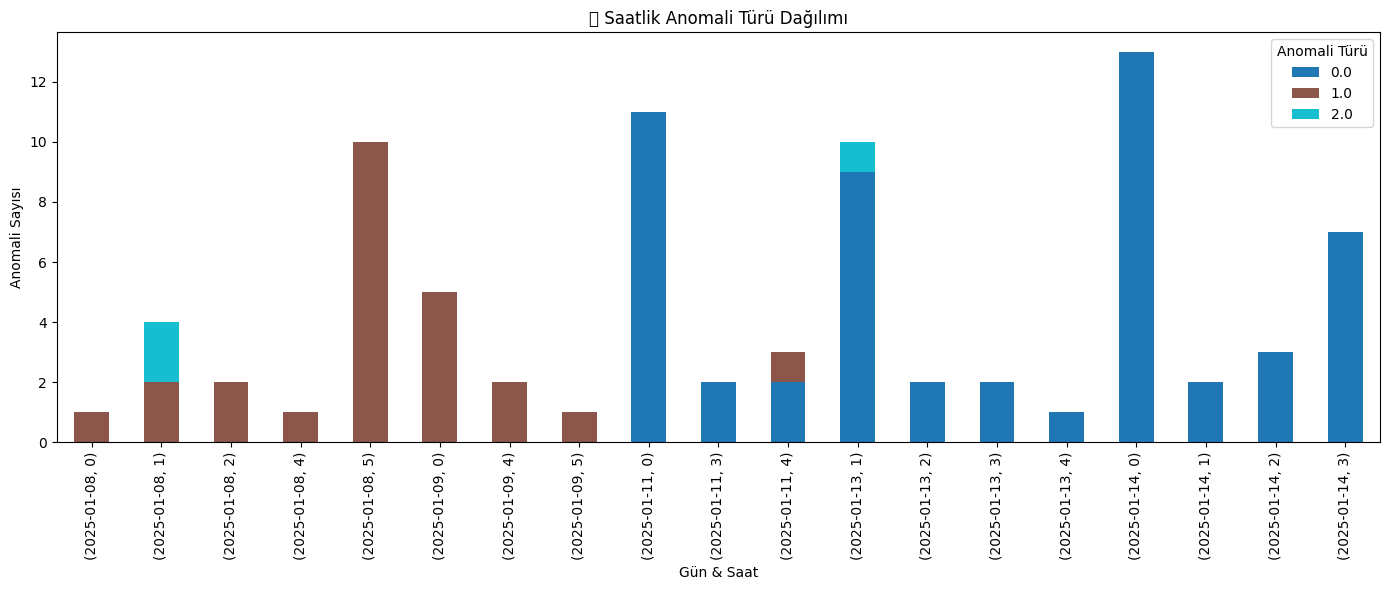

In [39]:
#   1. Saatlik anomaly_type dağılımı
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df["day"] = df["datetime"].dt.date
df["hour"] = df["datetime"].dt.hour
# Saatlik dağılım (NaN olmayanlar)
saatlik_dağılım = df[~df["anomaly_type"].isna()].groupby(["day", "hour", "anomaly_type"]).size().reset_index(name="count")

# Pivot tablo (grafik için daha uygun format)
saatlik_pivot = saatlik_dağılım.pivot_table(index=["day", "hour"], columns="anomaly_type", values="count", fill_value=0)

# Grafik
saatlik_pivot.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab10')
plt.title("⏰ Saatlik Anomali Türü Dağılımı")
plt.xlabel("Gün & Saat")
plt.ylabel("Anomali Sayısı")
plt.legend(title="Anomali Türü")
plt.tight_layout()
plt.show()


In [40]:
df.isnull().sum()

kalip                         0
cycleSayisi                   0
makineKodu                    0
SCLPAR_VALUE_V1               0
SCLPAR_VALUE_P1               0
SCLPAR_VALUE_V2               0
SCLPAR_VALUE_L2               0
SCLPAR_VALUE_TM               0
SCLPAR_VALUE_P3               0
SCLPAR_VALUE_SM               0
SCLPAR_VALUE_TR               0
SCLPAR_VALUE_PS               0
datetime                      0
SCLPAR_VALUE_P1_anomaly       0
SCLPAR_VALUE_V2_anomaly       0
SCLPAR_VALUE_TM_anomaly       0
SCLPAR_VALUE_P3_anomaly       0
SCLPAR_VALUE_TR_anomaly       0
SCLPAR_VALUE_PS_anomaly       0
SCLPAR_VALUE_L2_anomaly       0
SCLPAR_VALUE_SM_anomaly       0
GENEL_UYARI                   0
anomaly_count                 0
anomaly_type               1718
day                           0
hour                          0
dtype: int64

In [41]:
df["anomaly_type"] = df["anomaly_type"].fillna(3)    # Anomali içermeyen satırlar (NaN olanlar) 3 ile doldurularak, anomali olmayanlar için yeni grup oluşturuldu.

In [42]:
df["anomaly_type"].value_counts(dropna=False)

anomaly_type
3.0    1718
0.0      54
1.0      25
2.0       3
Name: count, dtype: int64

In [43]:
# rneğin datetime sütunun adı 'datetime' ise:
df["datetime"] = pd.to_datetime(df["datetime"])  # emin olmak için

# Gün ve saat kolonlarını oluştur
df["day"] = df["datetime"].dt.date
df["hour"] = df["datetime"].dt.hour

In [44]:
df.shape

(1800, 26)

C:\Users\havva\AppData\Local\Temp\ipykernel_12764\1269602972.py:15: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


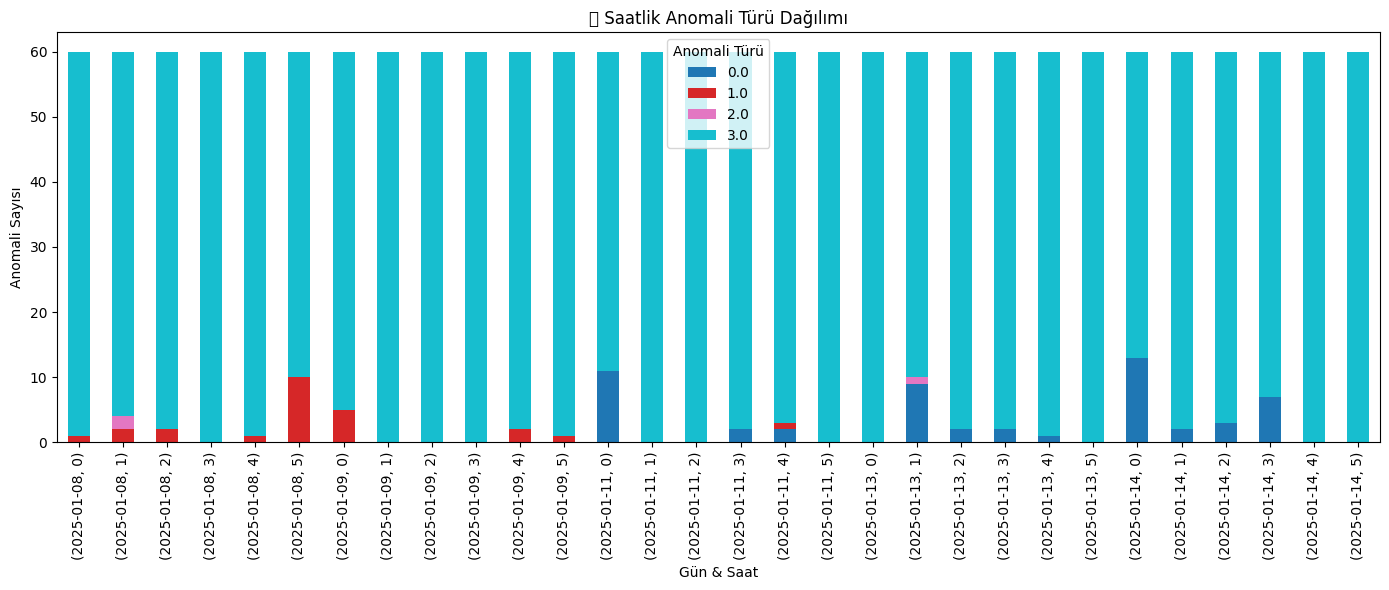

In [45]:
#   1. Saatlik anomaly_type dağılımı

# Saatlik dağılım (NaN olmayanlar)
saatlik_dağılım = df[~df["anomaly_type"].isna()].groupby(["day", "hour", "anomaly_type"]).size().reset_index(name="count")

# Pivot tablo (grafik için daha uygun format)
saatlik_pivot = saatlik_dağılım.pivot_table(index=["day", "hour"], columns="anomaly_type", values="count", fill_value=0)

# Grafik
saatlik_pivot.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab10')
plt.title("⏰ Saatlik Anomali Türü Dağılımı")
plt.xlabel("Gün & Saat")
plt.ylabel("Anomali Sayısı")
plt.legend(title="Anomali Türü")
plt.tight_layout()
plt.show()


## Anomaly Tip Bazlı Erken Uyarı Modeli

In [46]:
sensor_cols = [
    'SCLPAR_VALUE_V1', 'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
    'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
    'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS'
]

C:\Users\havva\AppData\Local\Temp\ipykernel_12764\90727886.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
C:\Users\havva\AppData\Local\Temp\ipykernel_12764\90727886.py:27: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


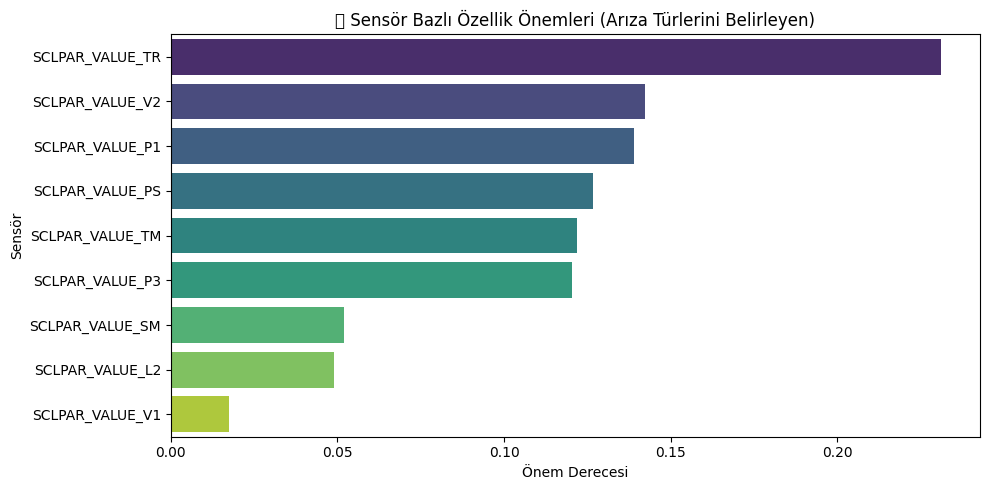

In [47]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Girdi (X) ve hedef (y)
X = df[sensor_cols]
y = df['anomaly_type']

# 2. Random Forest modeli eğit
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 3. Özellik önemlerini al
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Görselleştir
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("🔧 Sensör Bazlı Özellik Önemleri (Arıza Türlerini Belirleyen)")
plt.xlabel("Önem Derecesi")
plt.ylabel("Sensör")
plt.tight_layout()
plt.show()


# Bu grafik bize şu soruların cevabını verecek:
# Hangi sensörler arıza tipini tahmin ederken kritik rol oynuyor?
# Hangi sensörler daha az etkili?
# Belki bazı sensörler sadece belirli anomaly_type için baskın?


In [48]:
df.columns

Index(['kalip', 'cycleSayisi', 'makineKodu', 'SCLPAR_VALUE_V1',
       'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
       'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
       'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS', 'datetime',
       'SCLPAR_VALUE_P1_anomaly', 'SCLPAR_VALUE_V2_anomaly',
       'SCLPAR_VALUE_TM_anomaly', 'SCLPAR_VALUE_P3_anomaly',
       'SCLPAR_VALUE_TR_anomaly', 'SCLPAR_VALUE_PS_anomaly',
       'SCLPAR_VALUE_L2_anomaly', 'SCLPAR_VALUE_SM_anomaly', 'GENEL_UYARI',
       'anomaly_count', 'anomaly_type', 'day', 'hour'],
      dtype='object')

In [49]:
# Önemli sensörleri belirle
important_sensors = ['SCLPAR_VALUE_TR', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_PS',
                     'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3']

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Giriş ve hedef ayrımı
X = df[important_sensors]
y = df['anomaly_type']

# 2. Veri setini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 3. Modeli eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Tahmin yap
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.73      0.57      0.64        14
         1.0       0.75      0.50      0.60         6
         2.0       1.00      1.00      1.00         1
         3.0       0.98      0.99      0.98       429

    accuracy                           0.97       450
   macro avg       0.86      0.77      0.81       450
weighted avg       0.97      0.97      0.97       450



C:\Users\havva\AppData\Local\Temp\ipykernel_12764\3845575930.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


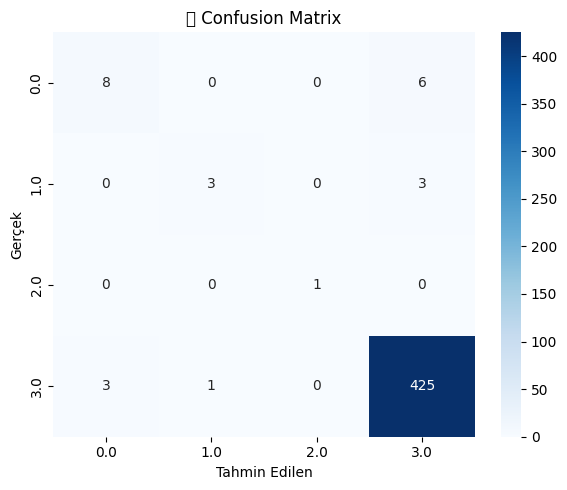

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Etiketleri tanımla (varsa 3 yerine 0, 1, 2 gibi gerçek anomaly_type'lar)
etiketler = sorted(y.unique())

# Görselleştir
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=etiketler, yticklabels=etiketler)
plt.title("📊 Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


In [52]:
df.head(10)

,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,...,SCLPAR_VALUE_P3_anomaly,SCLPAR_VALUE_TR_anomaly,SCLPAR_VALUE_PS_anomaly,SCLPAR_VALUE_L2_anomaly,SCLPAR_VALUE_SM_anomaly,GENEL_UYARI,anomaly_count,anomaly_type,day,hour
0,1,54352,MAK1,0.10,5,2.79,54,948,378,169,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0
1,1,54353,MAK1,0.09,6,2.81,55,932,378,169,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0
2,1,54355,MAK1,0.09,6,2.91,55,940,378,168,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0
3,1,54356,MAK1,0.10,6,2.97,55,920,380,169,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0
4,1,54358,MAK1,0.10,6,2.92,55,940,375,169,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0
5,1,54359,MAK1,0.09,5,2.91,56,952,378,168,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0
6,1,54360,MAK1,0.10,6,2.95,55,916,382,170,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0
7,1,54362,MAK1,0.10,6,2.95,56,944,382,168,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0
8,1,54363,MAK1,0.09,5,2.97,56,936,379,169,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0
9,1,54364,MAK1,0.10,5,2.95,57,936,381,166,...,False,False,False,False,False,🟢 Normal,0,3.0,2025-01-08,0


In [53]:
df.to_csv("yeni_veri/erken_uyari_modeli_için_test.csv", index=False)

In [54]:
# Örnek veri çek (örneğin 100. satır)
index = 49
sample = df.iloc[index][important_sensors].values.reshape(1, -1)

# Tahmin yap
predicted_type = model.predict(sample)

print(f"📌 Satır {index} için tahmin edilen anomali türü: {predicted_type[0]}")


📌 Satır 49 için tahmin edilen anomali türü: 3.0


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
index_list = [314, 24, 547, 256, 568]

for i in index_list:
    sample = df.loc[i, important_sensors].values.reshape(1, -1)  # sadece tek satır al
    predicted_type = model.predict(sample)
    print(f"📌 Satır {i} için tahmin edilen anomali türü: {predicted_type[0]}")


📌 Satır 314 için tahmin edilen anomali türü: 1.0
📌 Satır 24 için tahmin edilen anomali türü: 3.0
📌 Satır 547 için tahmin edilen anomali türü: 3.0
📌 Satır 256 için tahmin edilen anomali türü: 3.0
📌 Satır 568 için tahmin edilen anomali türü: 3.0


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid

# cycleSayisi sütunu  anomali tespiti

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleyelim
df = pd.read_csv("yeni_veri/520TonEnjPres_verileri_temizlenmis.csv")

In [57]:
df.head()

,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime
0,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:00
1,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:00
2,1,54355,MAK1,0.09,6,2.91,55,940,378,168,952,850,2025-01-08 00:02:00
3,1,54356,MAK1,0.10,6,2.97,55,920,380,169,928,855,2025-01-08 00:03:00
4,1,54358,MAK1,0.10,6,2.92,55,940,375,169,952,843,2025-01-08 00:04:00


###  Uyarı Sistemi

In [58]:
def kontrol_et(df, sensor_sutunlari, cycle_sutun='cycleSayisi', zaman_sutun='datetime'):
    """
    cycleSayisi tekrarlarını ve sensör hareketlerini analiz ederek uyarı etiketi üretir.
    
    Parametreler:
    - df: pandas DataFrame
    - sensor_sutunlari: kontrol edilecek sensör sütunları listesi
    - cycle_sutun: cycle sayısını belirten sütun adı
    - zaman_sutun: zaman sütunu adı (datetime tipinde olmalı)

    Döndürür:
    - Güncellenmiş df (yeni sütun: cycle_early_warning)
    """
    df = df.copy()
    df[zaman_sutun] = pd.to_datetime(df[zaman_sutun])
    df = df.sort_values(by=zaman_sutun).reset_index(drop=True)

    # cycleSayisi tekrarlarını kontrol et
    df["cycle_tekrar"] = df[cycle_sutun].shift(1) == df[cycle_sutun]

    # sensör hareketi kontrolü: bir önceki satıra göre fark al (değişim varsa hareket vardır)
    sensor_diff = df[sensor_sutunlari].diff().abs().sum(axis=1)
    df["sensor_hareket_var"] = sensor_diff > 0

    # Erken uyarı etiketi üret
    def uyarilari_etiketle(row):
        if row["cycle_tekrar"] and row["sensor_hareket_var"]:
            return "❗ Gerçek duruş olabilir (cycle tekrarı + sensör değişimi)"
        elif row["cycle_tekrar"] and not row["sensor_hareket_var"]:
            return "⚠️ Veri tekrarı olabilir (cycle tekrarı + sensör hareketsiz)"
        else:
            return "🟢 Normal"

    df["cycle_early_warning"] = df.apply(uyarilari_etiketle, axis=1)
    return df


- Cycle tekrarı var ve sensör değişimi var → "Gerçek duruş olabilir, kontrol edilmeli" ❗
- Cycle tekrarı var ama hiçbir sensör değişmiyor → "Veri tekrarı olabilir" ⚠️
- Diğer tüm durumlar → "Normal" 🟢

In [59]:
df.columns

Index(['kalip', 'cycleSayisi', 'makineKodu', 'SCLPAR_VALUE_V1',
       'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
       'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
       'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS', 'datetime'],
      dtype='object')

In [60]:
sensorler = ['SCLPAR_VALUE_V1',
       'SCLPAR_VALUE_P1', 'SCLPAR_VALUE_V2', 'SCLPAR_VALUE_L2',
       'SCLPAR_VALUE_TM', 'SCLPAR_VALUE_P3', 'SCLPAR_VALUE_SM',
       'SCLPAR_VALUE_TR', 'SCLPAR_VALUE_PS', ]
df_z = kontrol_et(df, sensor_sutunlari=sensorler)


In [61]:
gercek_durus_sayisi = df_z[df_z["cycle_early_warning"] == "❗ Gerçek duruş olabilir (cycle tekrarı + sensör değişimi)"].shape[0]
print(f"🔎 Gerçek duruş olabilecek toplam satır sayısı: {gercek_durus_sayisi}")

🔎 Gerçek duruş olabilecek toplam satır sayısı: 46
